# Exploring Apache Spark: A Comprehensive Guide

Welcome to this comprehensive guide on Apache Spark, a powerful distributed computing framework designed for processing and analyzing large-scale data sets. In this notebook, we will delve into various aspects of Spark, from its core architecture to its high-level Structured APIs and machine learning capabilities.

## Table of Contents

1. **Introduction**
2. **Spark Architecture**
3. **Spark RDDs**
4. **Spark DAG and Lazy Evaluation**
5. **Paired RDDs**
6. **Spark Structured APIs**
7. **Spark Sources of Data**
8. **Spark ML**
   - 8.1. Different Components of Spark ML
   - 8.2. Building Linear Regression Model Using Spark ML
   - 8.3. KMeans Clustering Using PySpark

Let's embark on this journey to understand the intricacies of Apache Spark and how it can empower you to tackle big data challenges efficiently.


# 1. Introduction. 

“Apache Spark™ is a multi-language engine for executing data engineering, data science, and machine learning on single-node machines or clusters." as defined on the company’s website. It is an open-source, distributed computing engine that provides a productive environment for data analysis owing to its lightning speed and support for various libraries. <br>
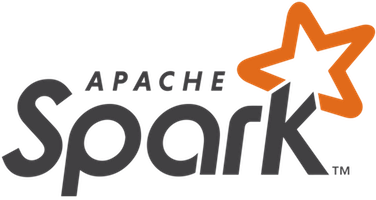 <br>

As an open-source, distributed-computing engine, Spark empowers developers and businesses to continuously enhance its extensive library offerings. Some common applications of Spark encompass:

1. Conducting in-depth exploratory analyses on datasets spanning hundreds of gigabytes, and even terabytes, within practical timeframes.
2. Generating near real-time reports from streaming data.
3. Developing machine learning models.
<br>

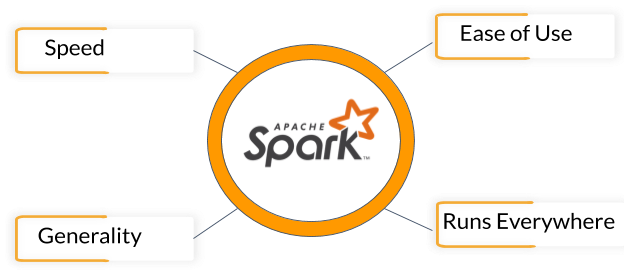

<br>
Spark's potency as a unified engine for colossal-scale data processing stems from four key attributes:

1. Swift Processing: In the realm of big data, handling vast and intricate datasets is paramount. Organizations seek frameworks capable of processing immense volumes of data swiftly. Spark excels in this domain, renowned for its speed, which surpasses the MapReduce framework by a factor of 100. This velocity is attributed to its in-memory computation and utilization of the DAG scheduler.

2. User-Friendliness: Spark provides support for Java, Scala, SQL, Python, and R, enabling the execution of queries using over 80 high-level operators interactively.

3. Versatility: Beyond basic map and reduce operations, Spark accommodates SQL queries, streaming data, and advanced analytics encompassing machine learning and graph algorithms. It boasts a formidable arsenal of libraries, including SQL, DataFrames, MLlib (for machine learning), GraphX, and Spark Streaming. Remarkably, Spark enables the integration of all these libraries' capabilities within a single workflow or application in its ecosystem.

4. Ubiquitous Execution: Spark can operate using its standalone cluster manager on platforms like Apache Mesos, on Hadoop Yarn or Kubernetes, and even in cloud environments. It possesses the capability to access data stored in diverse repositories, including HDFS, S3, and others.

### Expert Advice:
**Avoid equating Spark with HDFS. Spark serves as a data processing framework, while HDFS functions as a data storage platform. You might come across comparisons between Spark and Hadoop in different contexts, where Hadoop is viewed as a fusion of HDFS and MapReduce. Spark emerged from the Algorithms, Machines, and People (AMP) Lab at the University of California Berkeley as a substitute for the MapReduce model. Additionally, Spark has the capability to utilize HDFS as its underlying data storage layer.**

|                   | Hadoop MR Record | Spark Record | Spark 1 PB |
|-------------------|-----------------|--------------|------------|
| Data Size         | 102.5 TB        | 100 TB       | 1000 TB    |
| Elapsed Time      | 72 mins         | 23 mins      | 234 mins   |
| # Nodes           | 2100            | 206          | 190        |
| # Cores           | 50400 physical  | 6592 virtualized | 6080 virtualized |
| Cluster disk throughput (est.) | 3150 GB/s | 618 GB/s     | 570 GB/s   |
| Sort Benchmark Daytona Rules | Yes  | Yes          | No         |
| Network           | dedicated data center, 10Gbps | virtualized (EC2) 10Gbps network | virtualized (EC2) 10Gbps network |
| Sort rate         | 1.42 TB/min     | 4.27 TB/min  | 4.27 TB/min |
| Sort rate/node    | 0.67 GB/min     | 20.7 GB/min  | 22.5 GB/min |

                                                    World record set for 100 TB sort by open source and public cloud team


### Spark Ecosystem:  <br>
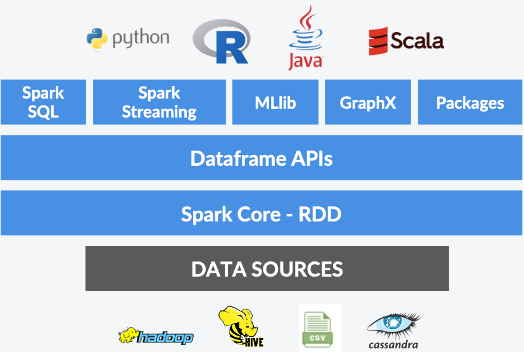

# 2. Spark Architecture
* Driver node (master): Runs the driver program, <br> 
* Worker nodes (slave): Runs the executor. <br> 
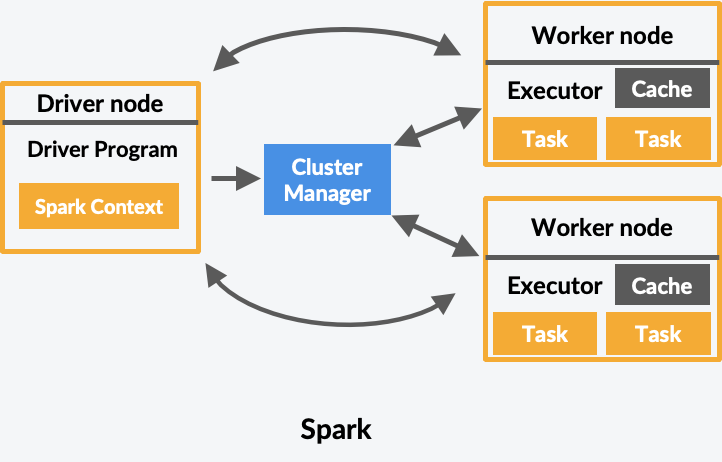

### The SparkContext's Role:

The SparkContext's primary function is not to execute code, but rather to devise an optimized physical execution plan within the Spark framework. It serves as the initial entry point of Spark into the distributed environment.

### The Driver Program's Role:

The driver program is akin to the main() method, containing instructions and actions to be executed on the data residing in each worker node. It constructs a generalized logical graph of operations, which primarily involve generating RDDs from source data, applying transformation functions for data manipulation and filtering, and concluding with actions such as data storage or printing.

As the driver program executes, the logical graph is converted into an execution plan. In Spark terminology, a task or action on data is referred to as a Spark job, which is further divided into distinct stages. These stages ensure the reliability and fault tolerance of the Spark environment, as elaborated in later sections. Ultimately, each stage encompasses tasks that are executed in parallel by the respective data partitions.

Once the complete execution plan is prepared, the Spark driver collaborates with executors to execute various tasks.

### The Executor's Role:

Executors are processes initiated for a Spark application on worker nodes. Each worker node houses one or more executors, responsible for task execution.

An executor's principal duty is to execute tasks and transmit results to the driver program. It also holds cached data generated during the execution of a user program. A single executor can utilize one or more cores on a given worker node.

Assuming the Following:

1. If one executor operates on a single core, and a worker node encompasses eight cores, then a single worker node will host eight executors. Since each executor possesses only one core for task execution, program operations cannot be parallelized.

2. If one executor operates on two cores, and a worker node encompasses eight cores, then a single worker node will contain four executors. With each executor equipped with two cores for task execution, program operations can be parallelized.

## The role of cluster manager:

It launches the executor programs and allocates and manages the resources allocated to each component.

### Pro Tip:

In cases where Spark is executed in local mode rather than a distributed environment, both the driver and executor programs operate within the same Java Virtual Machine (JVM).m

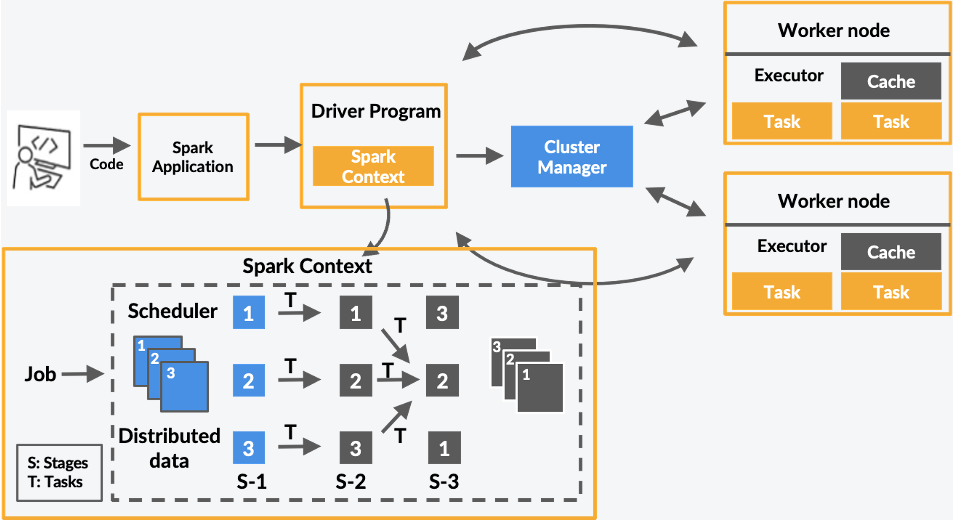

### Running Spark on Kubernetes
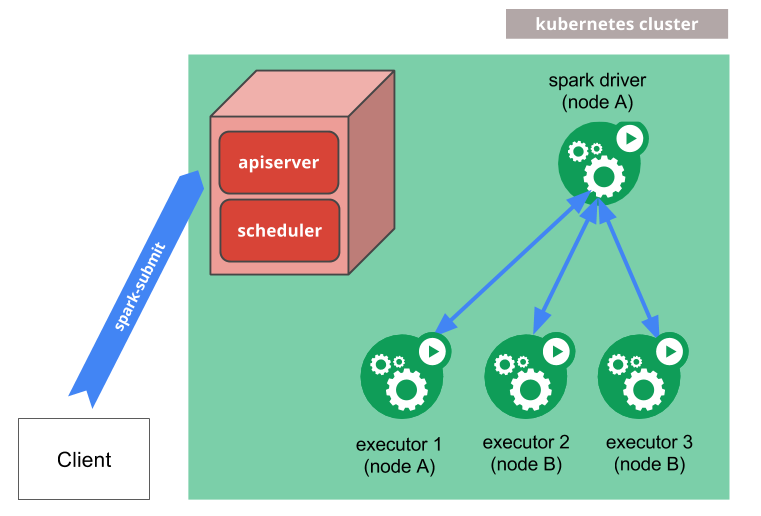 <br>

spark-submit can be directly used to submit a Spark application to a Kubernetes cluster. The submission mechanism works as follows:

* Spark creates a Spark driver running within a Kubernetes pod.
* The driver creates executors which are also running within Kubernetes pods and connects to them, and executes application code.
* When the application completes, the executor pods terminate and are cleaned up, but the driver pod persists logs and remains in “completed” state in the Kubernetes API until it’s eventually garbage collected or manually cleaned up.


# 3. Spark RDDs

All these components collectively constitute a single RDD, yet they aren't centralized in one location. Instead, they are dispersed across the executors within distinct worker nodes. Refer to the illustration below, depicting how these components are distributed across various nodes.

The key characteristics of RDDs are as follows:

Distributed Data Collection: RDDs are present in a distributed form across diverse worker nodes. This attribute enables RDDs to accommodate substantial datasets. The driver node assumes the responsibility of creating and overseeing this distribution.

Resilience to Faults: This pertains to the capacity to regenerate RDDs if they become lost during computation. Essentially, fault tolerance means that even if an RDD becomes corrupted (due to memory volatility), you can restore the unaltered RDD (making it resilient).

Immutability: RDDs are immutable, signifying that once an RDD undergoes transformation, a fresh RDD is generated, and you cannot make alterations to the previous RDDs. This trait of RDDs aids in preserving the data lineage, a concept you will delve into later in this session.

Parallel Processing: Despite RDDs existing as distributed files across worker nodes, their processing occurs concurrently. Multiple worker nodes collaborate simultaneously to execute the entire task.

Versatility in Data Sources: RDDs aren't reliant on any specific format of input data source. They are adaptable and can be constructed from a variety of sources.

These are basic RDDs. Another type of RDD, called paired RDD, is used extensively. All the data items in a paired RDD are key-value pairs. The keys in a paired RDD are not necessarily unique. A paired RDD is created by transforming a basic RDD into a paired RDD using various transformation operations, such as map. You will learn more about these operations in the next session. Now, let’s look at the following image, which demonstrates an example of a paired RDD.

In [1]:
! pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425350 sha256=a032d636a554d32c3a1949cb43e775035629bae638ea06e92c9d7be84c552611
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark


In [2]:
import pyspark
sc = pyspark.SparkContext()
sc

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/10/26 19:43:04 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


<SparkContext master=local[*] appName=pyspark-shell>

### Basics of RDD

In [3]:
rdd1 = sc.parallelize([1, 2, 3, 4, 5],3)

In [4]:
# Return a list that contains all of the elements in this RDD.
# Note : This method should only be used if the resulting array is expected to be small, 
# as all the data is loaded into the driver’s memory.
rdd1.collect()

[1, 2, 3, 4, 5]

In [5]:
# Return the number of elements in the RDD.
rdd1.count()

5

In [6]:
# Find the number of partitions.
rdd1.getNumPartitions()

3

In [7]:
# Return an RDD created by coalescing all elements within each partition into a list.
rdd1.glom().collect()

[[1], [2, 3], [4, 5]]

In [8]:
# Save the above created RDD as the text file.
rdd1.saveAsTextFile('spark_learn_folder')

### Transformation Operations on RDD

In [9]:
# Return a new RDD by applying a function to each element of this RDD.

# this is using the lambda functions (anonymous functions).
rdd = sc.parallelize(["b", "a", "c"])
rdd_upper = rdd.map(lambda x: x.upper())
rdd_upper.collect()

['B', 'A', 'C']

In [10]:
# Map ... using a regular function
def upper_case( v ):
    return v.upper()
rdd = sc.parallelize(["b", "a", "c"])
rdd.map(upper_case).collect()

['B', 'A', 'C']

In [11]:
# FlatMap function - It runs a function where the output of each element may not be a single element.
rdd = sc.parallelize(["b", "a", "c"])
rdd_upper = rdd.flatMap(lambda x: x.upper())
rdd_upper.collect()

['B', 'A', 'C']

In [12]:
# Filter function - This operation is useful to filter out the contents of an RDD based on a condition

#Return a new RDD containing only the elements that satisfy a predicate
rdd = sc.parallelize([1, 2, 3, 4, 5])
rdd2 = rdd.filter(lambda x: x % 2 == 0)
rdd2.collect()

[2, 4]

In [13]:
# Distinct function - This function will identify the unique elements in an RDD and put them in a new RDD
#Distinct Return a new RDD containing the distinct elements in this RDD.
sc.parallelize([1, 1, 2, 3]).distinct().collect()

[1, 2, 3]

In [14]:
# The result returned above will not be sorted, but in the random order
# If we want to get the data in sorted order in the driver memory
sorted(sc.parallelize([1, 4, 2, 3, 2]).distinct().collect())

[1, 2, 3, 4]

In [15]:
# Applied example for Map, flatMap, Filter and Distinct transformations

document1 = "Apache Spark is a unified analytics engine for large-scale data processing."
document2 = ""
document3 = "It is an open-source distributed-computing engine."
document4 = "Spark provides a productive environment for data analysis because of its lightning speed and support for various libraries."

rdd1 = sc.parallelize([document1,document2,document3,document4])
lines = rdd1.filter(lambda x:x!="")
lines.collect()

['Apache Spark is a unified analytics engine for large-scale data processing.',
 'It is an open-source distributed-computing engine.',
 'Spark provides a productive environment for data analysis because of its lightning speed and support for various libraries.']

In [16]:
#You have already built lines RDD in the filter example.

words = lines.map(lambda x:x.split(" "))

words.collect()

[['Apache',
  'Spark',
  'is',
  'a',
  'unified',
  'analytics',
  'engine',
  'for',
  'large-scale',
  'data',
  'processing.'],
 ['It', 'is', 'an', 'open-source', 'distributed-computing', 'engine.'],
 ['Spark',
  'provides',
  'a',
  'productive',
  'environment',
  'for',
  'data',
  'analysis',
  'because',
  'of',
  'its',
  'lightning',
  'speed',
  'and',
  'support',
  'for',
  'various',
  'libraries.']]

In [17]:
words = lines.flatMap(lambda x:x.split(" "))

words.collect()

['Apache',
 'Spark',
 'is',
 'a',
 'unified',
 'analytics',
 'engine',
 'for',
 'large-scale',
 'data',
 'processing.',
 'It',
 'is',
 'an',
 'open-source',
 'distributed-computing',
 'engine.',
 'Spark',
 'provides',
 'a',
 'productive',
 'environment',
 'for',
 'data',
 'analysis',
 'because',
 'of',
 'its',
 'lightning',
 'speed',
 'and',
 'support',
 'for',
 'various',
 'libraries.']

In [18]:
words = lines.flatMap(lambda x:x.split(" "))

words.distinct().count()

29

In [19]:
# Sorted function - This method is not used to perform an operation on an RDD but to sort the elements in a list

#sort the elements in a list
rdd1 = sc.parallelize([1,5,1,3,2,3,5])
sorted(rdd1.distinct().collect())

[1, 2, 3, 5]

In [20]:
# Union function - This operation will work on two RDDs and will result in an output that contains all the elements present in both the RDDs.

#Union Return the union of this RDD and another one.
rdd = sc.parallelize([1, 1, 2, 3])
rdd_union = rdd.union(rdd)
rdd_union.collect()

[1, 1, 2, 3, 1, 1, 2, 3]

In [21]:
# Intersection function - This operation will work on two RDDs and will result in an output that contains only those elements that are present in both the RDDs.

# intersection 
# Return the intersection of this RDD and another one. 
# The output will not contain any duplicate elements, even if the input RDDs did.

# NOTE : This method performs a shuffle internally
rdd1 = sc.parallelize([1, 10, 2, 3, 4, 5])
rdd2 = sc.parallelize([1, 6, 2, 3, 7, 8])
sorted(rdd1.intersection(rdd2).collect())

[1, 2, 3]

In [22]:
# Subtract function - This operation will work on two RDDs and will result in an output that contains all the elements present in rdd1 but not those present in rdd2.

#subtract
#Return each value in self that is not contained in other
x = sc.parallelize([ 1,2,3,4,5])
y = sc.parallelize([2,3,4])
sorted(x.subtract(y).collect())

[1, 5]

In [23]:
# Cartesian function - This operation will work on two RDDs and will result in an output that contains pairs of each element of rdd1 with each element of rdd2.
#cartesian
#Return the Cartesian product of this RDD and another one, that is, 
# the RDD of all pairs of elements (a, b) 
#where a is in self and b is in other.

rdd = sc.parallelize([1, 2])
rdd2 = sc.parallelize([3,4])
sorted(rdd.cartesian(rdd2).collect())

[(1, 3), (1, 4), (2, 3), (2, 4)]

## Action functions

In [24]:
# Collect function - Return a list that contains all of the elements in this RDD.
# NOTE : This method should only be used if the resulting array is expected to be small, 
# as all the data is loaded into the driver’s memory.

rdd = sc.parallelize([1, 2, 3, 4])
rdd.collect()

[1, 2, 3, 4]

In [25]:
# Count function - Return the number of elements in this RDD.
sc.parallelize([2, 3, 4]).count()

3

In [26]:
# countByValue function - Return the count of each unique value in this RDD as a dictionary of (value, count) pairs.
sc.parallelize([1, 2, 1, 2, 2], 2).countByValue().items()

dict_items([(1, 2), (2, 3)])

In [27]:
#countByValue
#Return the count of each unique value in this RDD
#as a dictionary of (value, count) pairs.
words.countByValue().items()

dict_items([('Apache', 1), ('Spark', 2), ('is', 2), ('a', 2), ('unified', 1), ('analytics', 1), ('engine', 1), ('for', 3), ('large-scale', 1), ('data', 2), ('processing.', 1), ('It', 1), ('an', 1), ('open-source', 1), ('distributed-computing', 1), ('engine.', 1), ('provides', 1), ('productive', 1), ('environment', 1), ('analysis', 1), ('because', 1), ('of', 1), ('its', 1), ('lightning', 1), ('speed', 1), ('and', 1), ('support', 1), ('various', 1), ('libraries.', 1)])

In [28]:
# take(num) function - Take the first num elements of the RDD.

# It works by first scanning one partition, and use the results from
# that partition to estimate the number of additional partitions needed 
# to satisfy the limit.

# Translated from the Scala implementation in RDD#take().


#Note this method should only be used if the resulting array is expected to be small, 
#as all the data is loaded into the driver’s memory.

sc.parallelize([2, 3, 4, 5, 6]).take(4)


[2, 3, 4, 5]

In [29]:
# top(num) function - Get the top N elements from an RDD.

#Note This method should only be used if the resulting array is 
#expected to be small, as all the data is loaded into the driver’s memory.

#Note It returns the list sorted in descending order.

sc.parallelize([2, 3, 4, 5, 6], 2).top(2)

[6, 5]

In [30]:
# reduce function - Reduces the elements of this RDD using the specified commutative and associative binary operat
#Currently reduces partitions locally.
sc.parallelize([9,3,1]).reduce(lambda x,y :x/y)
# We can pass the custom function inside this reduce function.

3.0

In [31]:
# fold function - Aggregate the elements of each partition, and then the results for all the partitions, using a given associative function and a neutral “zero value.
# The function op(t1, t2) is allowed to modify t1 and return it as its result value 
# to avoid object allocation; however, it should not modify t2.

from operator import add

sc.parallelize([1, 2, 3, 4, 5]).fold(0, add)

15

In [32]:
sc.parallelize([1, 2, 3, 4, 5]).fold(1, lambda x,y :x*y)

120

In [33]:
# Aggregate function - Aggregate the elements of each partition, and then the results for all the partitions, using a given combine functions and a neutral “zero value.”

# The functions op(t1, t2) is allowed to modify t1 and return it as 
# its result value to avoid object allocation; however, it should not modify t2.

# The first function (seqOp) can return a different result type, U, 
# than the type of this RDD. Thus, we need one operation for merging 
# a T into an U and one operation for merging two U
rdd = sc.parallelize([1, 2, 3, 4])
seqOp = (lambda x, y: (x[0] + y, x[1] + 1))
# above step should get us : (1,1),(2,1),(3,1), (4,1)
combOp = (lambda x, y: (x[0] + y[0], x[1] + y[1]))
rdd.aggregate((0,0), seqOp, combOp)

(10, 4)

In [34]:
# Foreach function - Applies a function to all elements of this RDD.

#foreach
def f(x): print(x)
rdd = sc.parallelize([1, 2, 3, 4, 5])
rdd.foreach(f)

1
2
4
5
3


# 4. Spark DAG LAZY evaluation.

Spark transformations follow lazy evaluation, meaning they're only evaluated when needed. They're stored as metadata in the background. This metadata includes the steps needed to create a new RDD from an existing one. When an action is triggered, all the transformations in the metadata are executed.

SparkContext creates an optimized plan in the background, stored as a Directed Acyclic Graph (DAG) Scheduler. 

DAG: Directed Acyclic Graph, where arrows go in one direction without loops.

The DAG Scheduler outlines how an RDD is derived from its parent RDD, ensuring fault tolerance.

If a Spark job fails, the DAG Scheduler helps return to the same state, making RDDs resilient. The lineage stores transformation details, not the data itself. This allows recreation of any stage from the original data.

Lazy evaluation reduces unnecessary computation, only performing it when a final result is needed. It optimizes executor memory usage by not creating and storing multiple RDDs until required.

Spark's web interface displays the lineage graph for a specific job.

For below code approx DAG would be like : <br>

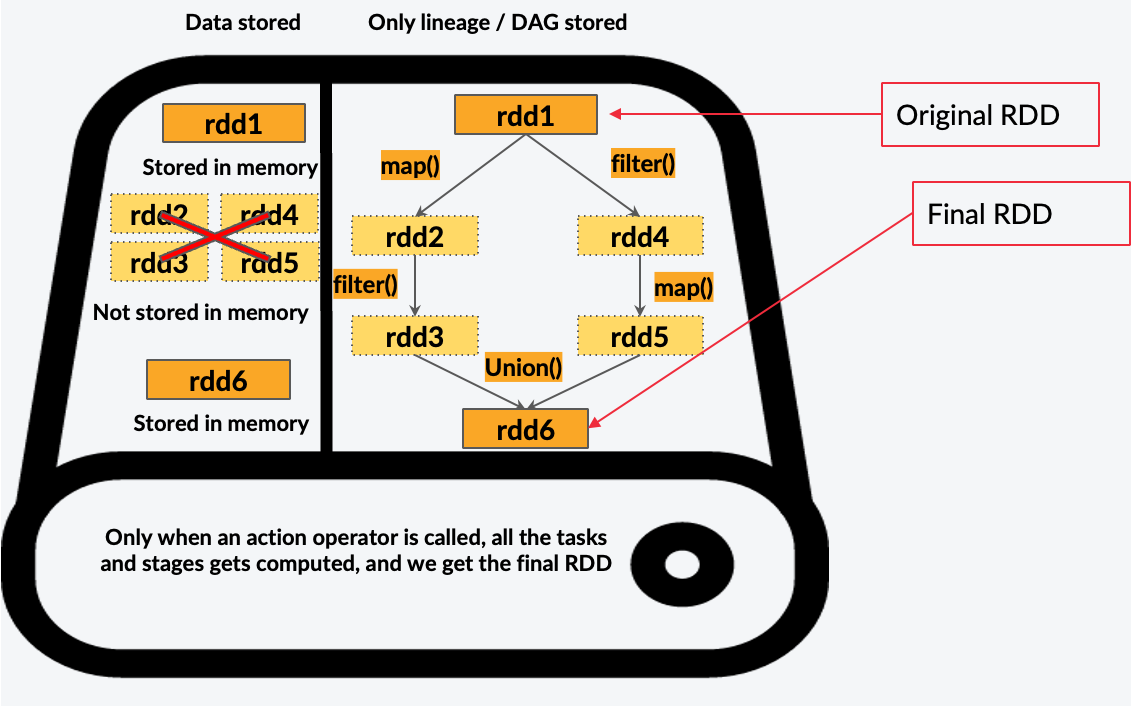

In [35]:
rdd1=sc.parallelize([11,12,13,14,15])
rdd2 = rdd1.map(lambda x:x+1)
rdd3 = rdd2.filter(lambda x:x > 12)
rdd4 = rdd1.filter(lambda x:x>11)
rdd5 = rdd4.map(lambda x:x*2)
rdd6 = rdd3.union(rdd5)
rdd6.collect()

[13, 14, 15, 16, 24, 26, 28, 30]

# 5. Paired RDDs
Paired RDD is a special RDD class that holds the data as (key, value) pair. Due to the difference in structure, there are various operations associated with paired RDDs.

In [36]:
# Creating paired RDDs-1
# create a paired RDD using the parallelize() function as the base RDDs
sales_in_a_supermarket = sc.parallelize([("shampoo", 1), ("soap", 1), ("conditioner", 3), ("brush", 2), ("soap", 2), ("shampoo", 2), ("bread", 2), ("meat", 2), ("tshirt", 2), ("jeans", 2)])
sales_in_a_supermarket.collect()


[('shampoo', 1),
 ('soap', 1),
 ('conditioner', 3),
 ('brush', 2),
 ('soap', 2),
 ('shampoo', 2),
 ('bread', 2),
 ('meat', 2),
 ('tshirt', 2),
 ('jeans', 2)]

In [37]:
# Creating paired RDDs-2
# In order to work with paired RDDs it's required to return the RDD which is 
# composed of tuple
rdd1 = sc.parallelize(["soap", "shampoo", "conditioner", "meat", "bread"])
pairedrdd= rdd1.map(lambda x: (x,1))
pairedrdd.collect()


[('soap', 1), ('shampoo', 1), ('conditioner', 1), ('meat', 1), ('bread', 1)]

In [38]:
# reduceByKey()

# Merge the values for each key using an associative and commutative 
# reduce function.

# This will also perform the merging locally on each mapper before sending 
# results to a reducer, similarly to a “combiner” in MapReduce.

# Output will be partitioned with numPartitions partitions, or the default 
# parallelism level if numPartitions is not specified. Default partitioner is hash-partition.
rdd2 = sc.parallelize([("shampoo", 1), ("soap", 1), ("conditioner", 3), ("brush", 2), ("soap", 2), ("shampoo", 2), ("bread", 2), ("meat", 2), ("tshirt", 2), ("jeans", 2)])

sorted(rdd2.reduceByKey(lambda x, y:x+y).collect())

[('bread', 2),
 ('brush', 2),
 ('conditioner', 3),
 ('jeans', 2),
 ('meat', 2),
 ('shampoo', 3),
 ('soap', 3),
 ('tshirt', 2)]

In [39]:
# groupByKey()

# Group the values for each key in the RDD into a single sequence. 
# Hash-partitions partition the resulting RDD with numPartitions.

# Note: If you are grouping in order to perform an aggregation (such as a sum or average) over each key, 
# using reduceByKey or aggregateByKey will provide much better performance.

rdd3 = sc.parallelize([("shampoo", 1), ("soap", 1), ("conditioner", 3), ("brush", 2), ("soap", 2), ("shampoo", 2), ("bread", 2), ("meat", 2), ("tshirt", 2), ("jeans", 2)])
sorted(rdd3.groupByKey().collect())

[('bread', <pyspark.resultiterable.ResultIterable at 0x7b6fdb6019c0>),
 ('brush', <pyspark.resultiterable.ResultIterable at 0x7b6fdb601a50>),
 ('conditioner', <pyspark.resultiterable.ResultIterable at 0x7b6fdb6017b0>),
 ('jeans', <pyspark.resultiterable.ResultIterable at 0x7b6fdb600fd0>),
 ('meat', <pyspark.resultiterable.ResultIterable at 0x7b6fdb600c70>),
 ('shampoo', <pyspark.resultiterable.ResultIterable at 0x7b6fdb6010c0>),
 ('soap', <pyspark.resultiterable.ResultIterable at 0x7b6fdb601750>),
 ('tshirt', <pyspark.resultiterable.ResultIterable at 0x7b6fdb601990>)]

In [40]:
# mapvalues()

# Pass each value in the key-value pair RDD through a map function without changing the keys; 
# this also retains the original RDD’s partitioning.

sales = sc.parallelize([("cosmetics", ["shampoo", "soap", "conditioner", "brush"]), ("food", ["bread", "meat"]), ("clothes", ["tshirt", "jeans"])])
def f(sales): return len(sales)
sales.mapValues(f).collect()

[('cosmetics', 4), ('food', 2), ('clothes', 2)]

In [41]:
# flatmapvalues()

# Pass each value in the key-value pair RDD through a flatMap function without changing the keys.
# This also retans the original RDD’s partitioning.
sales = sc.parallelize([("cosmetics", ["shampoo", "soap", "conditioner", "brush"]), ("food", ["bread", "meat"]), ("clothes", ["tshirt", "jeans"])])
def f(sales): return sales
sales.flatMapValues(f).collect()


[('cosmetics', 'shampoo'),
 ('cosmetics', 'soap'),
 ('cosmetics', 'conditioner'),
 ('cosmetics', 'brush'),
 ('food', 'bread'),
 ('food', 'meat'),
 ('clothes', 'tshirt'),
 ('clothes', 'jeans')]

In [42]:
# keys()

# Return an RDD with the keys of each tuple.
sales_1 = sc.parallelize([("shampoo", 1), ("soap", 1), ("conditioner", 3), ("brush", 2), ("soap", 2), ("shampoo", 2), ("bread", 2), ("meat", 2), ("tshirt", 2), ("jeans", 2)])
k = sales_1.keys();
k.collect()


['shampoo',
 'soap',
 'conditioner',
 'brush',
 'soap',
 'shampoo',
 'bread',
 'meat',
 'tshirt',
 'jeans']

In [43]:
# values()

# Return an RDD with the values of each tuple.
sales_1 = sc.parallelize([("shampoo", 1), ("soap", "1"), ("conditioner", 3), ("brush", 2), ("soap", 2), ("shampoo", 2), ("bread", 2), ("meat", 2), ("tshirt", 2), ("jeans", 2)])
v = sales_1.values() 
v.collect()

[1, '1', 3, 2, 2, 2, 2, 2, 2, 2]

In [44]:
# sortByKeys()

# Sorts this RDD, which is assumed to consist of (key, value) pairs.
tmp = [('Apple', 12), ('Banana', 11), ('Mango', 14), ('Carrot', 13), ('Orange', 15)]
sc.parallelize(tmp).sortByKey(True, 1).collect()

[('Apple', 12), ('Banana', 11), ('Carrot', 13), ('Mango', 14), ('Orange', 15)]

In [45]:
# subtractByKey()

# Return each (key, value) pair in self that has no pair with matching key in other.

x = sc.parallelize([("a", 1), ("b", 4), ("b", 5), ("a", 2)])
y = sc.parallelize([("a", 3), ("c", None)])
sorted(x.subtractByKey(y).collect())

[('b', 4), ('b', 5)]

In [46]:
# Join()

# Return an RDD containing all pairs of elements with matching keys in self and other.

# Each pair of elements will be returned as a (k, (v1, v2)) tuple,
# where (k, v1) is in self and (k, v2) is in other.

# Performs a hash join across the cluster.

x = sc.parallelize([('Apple', 50), ('Banana', 100), ('Mango', 150), ('Carrot', 120)])
y = sc.parallelize([('Apple', 100), ('Banana', 120), ('Mango',150)])
sorted(x.join(y).collect())

[('Apple', (50, 100)), ('Banana', (100, 120)), ('Mango', (150, 150))]

In [47]:
# RightOuterJoin()

# Perform a right outer join of self and other.

# For each element (k, w) in other, the resulting RDD will either contain
# all pairs (k, (v, w)) for v in this, or the pair (k, (None, w)) if no elements in self have key k.

# Hash-partitions partition the resulting RDD into the given number of partitions.

rdd1 = sc.parallelize([('Apple', 50), ('Banana', 100), ('Mango', 150), ('Carrot', 120)])
rdd2 = sc.parallelize([('Apple', 100), ('Banana', 120), ('Mango',150)])
sorted(rdd2.rightOuterJoin(rdd1).collect())


[('Apple', (100, 50)),
 ('Banana', (120, 100)),
 ('Carrot', (None, 120)),
 ('Mango', (150, 150))]

In [48]:
# LefttOuterJoin()

# Perform a left outer join of self and other.

# For each element (k, v) in self, the resulting RDD will either contain 
# all pairs (k, (v, w)) for w in other, or the pair (k, (v, None)) if no elements in other have key k.

# Hash-partitions partition the resulting RDD into the given number of partitions.

rdd1 = sc.parallelize([('Apple', 50), ('Banana', 100), ('Mango', 150), ('Carrot', 120)])
rdd2 = sc.parallelize([('Apple', 100), ('Banana', 120), ('Mango',150)])
sorted(rdd2.leftOuterJoin(rdd1).collect())

[('Apple', (100, 50)), ('Banana', (120, 100)), ('Mango', (150, 150))]

In [49]:
# cogroup()

# For each key k in self or other, return a resulting RDD that contains a 
# tuple with the list of values for that key in self as well as other.

x = sc.parallelize([('Apple', 50), ('Banana', 100), ('Mango', 150), ('Carrot', 120)])
y = sc.parallelize([('Apple', 100), ('Banana', 120), ('Mango',150)])

#rdd1.cogroup(rdd2).collect()  
# [('a',
#   (<pyspark.resultiterable.ResultIterable at 0x7f5c5c0dfed0>,
#    <pyspark.resultiterable.ResultIterable at 0x7f5c5c1c1450>)),
#  ('b',
#   (<pyspark.resultiterable.ResultIterable at 0x7f5c5c07bbd0>,
#    <pyspark.resultiterable.ResultIterable at 0x7f5c5c07bc50>))]


[(x, tuple(map(list, y))) for x, y in sorted(list(x.cogroup(y).collect()))]

[('Apple', ([50], [100])),
 ('Banana', ([100], [120])),
 ('Carrot', ([120], [])),
 ('Mango', ([150], [150]))]

In [50]:
# countByKey()

# Count the number of elements for each key, and return the result to 
# the master as a dictionary.

rdd = sc.parallelize([('Apple', 50), ('Banana', 100), ('Mango', 150), ('Carrot', 120)])
sorted(rdd.countByKey().items())

[('Apple', 1), ('Banana', 1), ('Carrot', 1), ('Mango', 1)]

In [51]:
# lookup(key)

# Return the list of values in the RDD for key. 
# This operation is done efficiently if the RDD has a known partitioner 
# only by searching the partition that the key maps to.

l = range(1000)
rdd = sc.parallelize(zip(l, l), 10)
rdd.lookup(42)

[42]

# 6. Spark Structured APIs

### Limitations of RDDs <br>
* Data stored with the RDD abstraction is unstructured. While dealing with unstructured data, Spark recognizes that there are parameters (or attributes) associated with each data point object, but Spark cannot read the inside object to know more details of the parameters. <br>

* RDD is a low-level abstraction. The code has very low-level details about the execution of a job. <br>

### Structured APIs

Structured APIs refer to abstractions where data is organized in a structured format, resembling rows and columns. This format enables Spark to efficiently process individual features of data points. 

Writing code in a structured API is straightforward and easy to understand, akin to using the Pandas library.

One significant enhancement in structured APIs is the Catalyst optimizer, an integrated tool that maximizes code performance in minimal time. While a detailed explanation of its workflow will be covered later, it's worth noting that structured APIs outperform RDDs in terms of speed. Moreover, with Spark 3.2+, Adaptive Query Optimization techniques have been introduced to further enhance performance.

It's important to note that Spark SQL is the module employed for processing structured data. DataFrames, Datasets, and SQL tables/views (collectively referred to as Spark SQL) are APIs built on Spark SQL for designing data flows. Regardless of whether you choose to use DataFrames, Datasets, or the SQL API, the functionalities are accessed through the pySpark.sql module.

The three main structured APIs in Spark are:

1. DataFrames: These are collections of data arranged in a tabular form with rows and columns, allowing for the processing of large volumes of structured data. Unlike RDDs, data in DataFrames is organized in rows and columns. However, DataFrames do not possess compile-time type safety.

2. Datasets: Extending the functionality of DataFrames, Datasets combine the features of both DataFrames and RDDs. They offer an object-oriented interface for safe data processing. It's worth noting that Datasets are only available in JVM-based languages like Scala and Java, and not in Python and R.

3. SQL tables and views (Spark SQL): With Spark SQL, you can execute SQL-like queries against views or tables organized within databases.

### Spark DataFrame

In [52]:
from pyspark.sql import SparkSession

In [53]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("Basics").getOrCreate()

In [54]:
df = spark.read.options(inferSchema='True',header='True').csv("/kaggle/input/employee-dataset/Employee.csv")

In [55]:
df.show()

+---------+-----------+---------+-----------+---+------+-----------+-------------------------+----------+
|Education|JoiningYear|     City|PaymentTier|Age|Gender|EverBenched|ExperienceInCurrentDomain|LeaveOrNot|
+---------+-----------+---------+-----------+---+------+-----------+-------------------------+----------+
|Bachelors|       2017|Bangalore|          3| 34|  Male|         No|                        0|         0|
|Bachelors|       2013|     Pune|          1| 28|Female|         No|                        3|         1|
|Bachelors|       2014|New Delhi|          3| 38|Female|         No|                        2|         0|
|  Masters|       2016|Bangalore|          3| 27|  Male|         No|                        5|         1|
|  Masters|       2017|     Pune|          3| 24|  Male|        Yes|                        2|         1|
|Bachelors|       2016|Bangalore|          3| 22|  Male|         No|                        0|         0|
|Bachelors|       2015|New Delhi|          3| 

In [56]:
df.printSchema()

root
 |-- Education: string (nullable = true)
 |-- JoiningYear: integer (nullable = true)
 |-- City: string (nullable = true)
 |-- PaymentTier: integer (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Gender: string (nullable = true)
 |-- EverBenched: string (nullable = true)
 |-- ExperienceInCurrentDomain: integer (nullable = true)
 |-- LeaveOrNot: integer (nullable = true)



In [57]:
df.columns

['Education',
 'JoiningYear',
 'City',
 'PaymentTier',
 'Age',
 'Gender',
 'EverBenched',
 'ExperienceInCurrentDomain',
 'LeaveOrNot']

In [58]:
df.describe().show()

23/10/26 19:43:48 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+-------+---------+------------------+---------+------------------+------------------+------+-----------+-------------------------+------------------+
|summary|Education|       JoiningYear|     City|       PaymentTier|               Age|Gender|EverBenched|ExperienceInCurrentDomain|        LeaveOrNot|
+-------+---------+------------------+---------+------------------+------------------+------+-----------+-------------------------+------------------+
|  count|     4653|              4653|     4653|              4653|              4653|  4653|       4653|                     4653|              4653|
|   mean|     NULL|2015.0629701267999|     NULL|2.6982591876208897|29.393294648613796|  NULL|       NULL|        2.905652267354395|0.3438641736514077|
| stddev|     NULL|1.8633768286863406|     NULL|0.5614354643364917|  4.82608700912605|  NULL|       NULL|       1.5582403309268575|0.4750474751488102|
|    min|Bachelors|              2012|Bangalore|                 1|                22|Female| 

In [59]:
# Columns
df.select('age').show()

+---+
|age|
+---+
| 34|
| 28|
| 38|
| 27|
| 24|
| 22|
| 38|
| 34|
| 23|
| 37|
| 27|
| 34|
| 32|
| 39|
| 37|
| 29|
| 34|
| 34|
| 30|
| 22|
+---+
only showing top 20 rows



In [60]:
# Multiple Columns:
df.select(['Age','Gender']).show()

+---+------+
|Age|Gender|
+---+------+
| 34|  Male|
| 28|Female|
| 38|Female|
| 27|  Male|
| 24|  Male|
| 22|  Male|
| 38|  Male|
| 34|Female|
| 23|  Male|
| 37|  Male|
| 27|  Male|
| 34|  Male|
| 32|  Male|
| 39|  Male|
| 37|  Male|
| 29|  Male|
| 34|Female|
| 34|  Male|
| 30|Female|
| 22|Female|
+---+------+
only showing top 20 rows



In [61]:
# Calling Rows
df.head(2)

[Row(Education='Bachelors', JoiningYear=2017, City='Bangalore', PaymentTier=3, Age=34, Gender='Male', EverBenched='No', ExperienceInCurrentDomain=0, LeaveOrNot=0),
 Row(Education='Bachelors', JoiningYear=2013, City='Pune', PaymentTier=1, Age=28, Gender='Female', EverBenched='No', ExperienceInCurrentDomain=3, LeaveOrNot=1)]

In [62]:
row_list = df.head(5)

In [63]:
row_list

[Row(Education='Bachelors', JoiningYear=2017, City='Bangalore', PaymentTier=3, Age=34, Gender='Male', EverBenched='No', ExperienceInCurrentDomain=0, LeaveOrNot=0),
 Row(Education='Bachelors', JoiningYear=2013, City='Pune', PaymentTier=1, Age=28, Gender='Female', EverBenched='No', ExperienceInCurrentDomain=3, LeaveOrNot=1),
 Row(Education='Bachelors', JoiningYear=2014, City='New Delhi', PaymentTier=3, Age=38, Gender='Female', EverBenched='No', ExperienceInCurrentDomain=2, LeaveOrNot=0),
 Row(Education='Masters', JoiningYear=2016, City='Bangalore', PaymentTier=3, Age=27, Gender='Male', EverBenched='No', ExperienceInCurrentDomain=5, LeaveOrNot=1),
 Row(Education='Masters', JoiningYear=2017, City='Pune', PaymentTier=3, Age=24, Gender='Male', EverBenched='Yes', ExperienceInCurrentDomain=2, LeaveOrNot=1)]

In [64]:
row_list[0]

Row(Education='Bachelors', JoiningYear=2017, City='Bangalore', PaymentTier=3, Age=34, Gender='Male', EverBenched='No', ExperienceInCurrentDomain=0, LeaveOrNot=0)

In [65]:
# Creating new columns
df.withColumn('Age_months', df['Age']*12).show()

+---------+-----------+---------+-----------+---+------+-----------+-------------------------+----------+----------+
|Education|JoiningYear|     City|PaymentTier|Age|Gender|EverBenched|ExperienceInCurrentDomain|LeaveOrNot|Age_months|
+---------+-----------+---------+-----------+---+------+-----------+-------------------------+----------+----------+
|Bachelors|       2017|Bangalore|          3| 34|  Male|         No|                        0|         0|       408|
|Bachelors|       2013|     Pune|          1| 28|Female|         No|                        3|         1|       336|
|Bachelors|       2014|New Delhi|          3| 38|Female|         No|                        2|         0|       456|
|  Masters|       2016|Bangalore|          3| 27|  Male|         No|                        5|         1|       324|
|  Masters|       2017|     Pune|          3| 24|  Male|        Yes|                        2|         1|       288|
|Bachelors|       2016|Bangalore|          3| 22|  Male|        

In [66]:
df2 = df.withColumn('Age_months', df['Age']*12)
df2.show()

+---------+-----------+---------+-----------+---+------+-----------+-------------------------+----------+----------+
|Education|JoiningYear|     City|PaymentTier|Age|Gender|EverBenched|ExperienceInCurrentDomain|LeaveOrNot|Age_months|
+---------+-----------+---------+-----------+---+------+-----------+-------------------------+----------+----------+
|Bachelors|       2017|Bangalore|          3| 34|  Male|         No|                        0|         0|       408|
|Bachelors|       2013|     Pune|          1| 28|Female|         No|                        3|         1|       336|
|Bachelors|       2014|New Delhi|          3| 38|Female|         No|                        2|         0|       456|
|  Masters|       2016|Bangalore|          3| 27|  Male|         No|                        5|         1|       324|
|  Masters|       2017|     Pune|          3| 24|  Male|        Yes|                        2|         1|       288|
|Bachelors|       2016|Bangalore|          3| 22|  Male|        

In [67]:
# Renaming the column name:
df2.withColumnRenamed('Age_months','employee_Age_months').show()

+---------+-----------+---------+-----------+---+------+-----------+-------------------------+----------+-------------------+
|Education|JoiningYear|     City|PaymentTier|Age|Gender|EverBenched|ExperienceInCurrentDomain|LeaveOrNot|employee_Age_months|
+---------+-----------+---------+-----------+---+------+-----------+-------------------------+----------+-------------------+
|Bachelors|       2017|Bangalore|          3| 34|  Male|         No|                        0|         0|                408|
|Bachelors|       2013|     Pune|          1| 28|Female|         No|                        3|         1|                336|
|Bachelors|       2014|New Delhi|          3| 38|Female|         No|                        2|         0|                456|
|  Masters|       2016|Bangalore|          3| 27|  Male|         No|                        5|         1|                324|
|  Masters|       2017|     Pune|          3| 24|  Male|        Yes|                        2|         1|             

### DataFrame Filter and Collect

In [68]:
df = spark.read.options(inferSchema='True',header='True').csv("/kaggle/input/microsoft-stock/MSFT-stock.csv")
df.show(5)

+----------+----------+----------+----------+----------+----------+--------+
|      Date|      Open|      High|       Low|     Close| Adj Close|  Volume|
+----------+----------+----------+----------+----------+----------+--------+
|2020-01-27|161.149994|163.380005|160.199997|162.279999|161.837952|32078100|
|2020-01-28|163.779999|165.759995|163.070007|165.460007|165.009308|24899900|
|2020-01-29|167.839996|    168.75|165.690002|168.039993| 167.58226|34754500|
|2020-01-30|174.050003|174.050003|170.789993|172.779999|172.309357|51597500|
|2020-01-31|172.210007|172.399994|169.580002|170.229996|169.766296|36142700|
+----------+----------+----------+----------+----------+----------+--------+
only showing top 5 rows



In [69]:
df.columns

['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

In [70]:
df.printSchema()

root
 |-- Date: date (nullable = true)
 |-- Open: double (nullable = true)
 |-- High: double (nullable = true)
 |-- Low: double (nullable = true)
 |-- Close: double (nullable = true)
 |-- Adj Close: double (nullable = true)
 |-- Volume: integer (nullable = true)



In [71]:
df.filter(df['High'] > 50).show()

+----------+----------+----------+----------+----------+----------+--------+
|      Date|      Open|      High|       Low|     Close| Adj Close|  Volume|
+----------+----------+----------+----------+----------+----------+--------+
|2020-01-27|161.149994|163.380005|160.199997|162.279999|161.837952|32078100|
|2020-01-28|163.779999|165.759995|163.070007|165.460007|165.009308|24899900|
|2020-01-29|167.839996|    168.75|165.690002|168.039993| 167.58226|34754500|
|2020-01-30|174.050003|174.050003|170.789993|172.779999|172.309357|51597500|
|2020-01-31|172.210007|172.399994|169.580002|170.229996|169.766296|36142700|
|2020-02-03|170.429993|     174.5|170.399994|174.380005|173.904999|30149100|
|2020-02-04|177.139999|180.639999|176.309998|180.119995|179.629364|36433300|
|2020-02-05|184.029999|184.199997|178.410004|179.899994|179.409958|39186300|
|2020-02-06|180.970001|183.820007|180.059998|183.630005|183.129807|27751400|
|2020-02-07|182.850006|185.630005|182.479996|183.889999|183.389099|33529100|

In [72]:
df.filter((df['High'] > 150) & (df['Adj Close'] > 140)).show()

+----------+----------+----------+----------+----------+----------+--------+
|      Date|      Open|      High|       Low|     Close| Adj Close|  Volume|
+----------+----------+----------+----------+----------+----------+--------+
|2020-01-27|161.149994|163.380005|160.199997|162.279999|161.837952|32078100|
|2020-01-28|163.779999|165.759995|163.070007|165.460007|165.009308|24899900|
|2020-01-29|167.839996|    168.75|165.690002|168.039993| 167.58226|34754500|
|2020-01-30|174.050003|174.050003|170.789993|172.779999|172.309357|51597500|
|2020-01-31|172.210007|172.399994|169.580002|170.229996|169.766296|36142700|
|2020-02-03|170.429993|     174.5|170.399994|174.380005|173.904999|30149100|
|2020-02-04|177.139999|180.639999|176.309998|180.119995|179.629364|36433300|
|2020-02-05|184.029999|184.199997|178.410004|179.899994|179.409958|39186300|
|2020-02-06|180.970001|183.820007|180.059998|183.630005|183.129807|27751400|
|2020-02-07|182.850006|185.630005|182.479996|183.889999|183.389099|33529100|

In [73]:
df.filter((df['High'] > 150) & ~(df['Adj Close'] > 140)).show()

+----+----+----+---+-----+---------+------+
|Date|Open|High|Low|Close|Adj Close|Volume|
+----+----+----+---+-----+---------+------+
+----+----+----+---+-----+---------+------+



In [74]:
df.filter(df['High'] == 183.5).show()

+----------+----------+-----+------+----------+----------+--------+
|      Date|      Open| High|   Low|     Close| Adj Close|  Volume|
+----------+----------+-----+------+----------+----------+--------+
|2020-02-21|183.169998|183.5|177.25|178.589996|178.589996|48572600|
+----------+----------+-----+------+----------+----------+--------+



In [75]:
# collecting the data.

df.filter((df['High'] > 150) & (df['Adj Close'] > 140)).collect()

[Row(Date=datetime.date(2020, 1, 27), Open=161.149994, High=163.380005, Low=160.199997, Close=162.279999, Adj Close=161.837952, Volume=32078100),
 Row(Date=datetime.date(2020, 1, 28), Open=163.779999, High=165.759995, Low=163.070007, Close=165.460007, Adj Close=165.009308, Volume=24899900),
 Row(Date=datetime.date(2020, 1, 29), Open=167.839996, High=168.75, Low=165.690002, Close=168.039993, Adj Close=167.58226, Volume=34754500),
 Row(Date=datetime.date(2020, 1, 30), Open=174.050003, High=174.050003, Low=170.789993, Close=172.779999, Adj Close=172.309357, Volume=51597500),
 Row(Date=datetime.date(2020, 1, 31), Open=172.210007, High=172.399994, Low=169.580002, Close=170.229996, Adj Close=169.766296, Volume=36142700),
 Row(Date=datetime.date(2020, 2, 3), Open=170.429993, High=174.5, Low=170.399994, Close=174.380005, Adj Close=173.904999, Volume=30149100),
 Row(Date=datetime.date(2020, 2, 4), Open=177.139999, High=180.639999, Low=176.309998, Close=180.119995, Adj Close=179.629364, Volume=3

In [76]:
# collect retuns nested row objects.
row_result = df.filter((df['High'] > 150) & (df['Adj Close'] > 140)).collect()
type(row_result)

list

In [77]:
row1 = row_result[0]
row1

Row(Date=datetime.date(2020, 1, 27), Open=161.149994, High=163.380005, Low=160.199997, Close=162.279999, Adj Close=161.837952, Volume=32078100)

In [78]:
# Rows can be called to turn into dictionaries, to access individual values

newdict = row1.asDict()
newdict

{'Date': datetime.date(2020, 1, 27),
 'Open': 161.149994,
 'High': 163.380005,
 'Low': 160.199997,
 'Close': 162.279999,
 'Adj Close': 161.837952,
 'Volume': 32078100}

In [79]:
for item in row1:
    print(item)

2020-01-27
161.149994
163.380005
160.199997
162.279999
161.837952
32078100


### DataFrame Functions.

In [80]:
df2.groupby('Education')

GroupedData[grouping expressions: [Education], value: [Education: string, JoiningYear: int ... 8 more fields], type: GroupBy]

In [81]:
# average
df2.groupby('Education').mean().show()

+---------+------------------+------------------+------------------+------------------------------+-------------------+------------------+
|Education|  avg(JoiningYear)|  avg(PaymentTier)|          avg(Age)|avg(ExperienceInCurrentDomain)|    avg(LeaveOrNot)|   avg(Age_months)|
+---------+------------------+------------------+------------------+------------------------------+-------------------+------------------+
|  Masters|2015.8064146620848|2.4650630011454755| 29.29095074455899|             2.884306987399771| 0.4879725085910653| 351.4914089347079|
|Bachelors|2014.8833657317412| 2.753124132185504|29.422938072757567|             2.910580394334907| 0.3135240211052485|353.07525687309084|
|      PHD|2015.0502793296089|2.7318435754189943| 29.29608938547486|             2.910614525139665|0.25139664804469275|351.55307262569835|
+---------+------------------+------------------+------------------+------------------------------+-------------------+------------------+



In [82]:
# Count
df2.groupby('Education').count().show()

+---------+-----+
|Education|count|
+---------+-----+
|  Masters|  873|
|Bachelors| 3601|
|      PHD|  179|
+---------+-----+



In [83]:
# Max
df2.groupby('Education').max().show()

+---------+----------------+----------------+--------+------------------------------+---------------+---------------+
|Education|max(JoiningYear)|max(PaymentTier)|max(Age)|max(ExperienceInCurrentDomain)|max(LeaveOrNot)|max(Age_months)|
+---------+----------------+----------------+--------+------------------------------+---------------+---------------+
|  Masters|            2018|               3|      41|                             7|              1|            492|
|Bachelors|            2018|               3|      41|                             7|              1|            492|
|      PHD|            2018|               3|      41|                             5|              1|            492|
+---------+----------------+----------------+--------+------------------------------+---------------+---------------+



In [84]:
# Sum
df2.groupby('Education').sum().show()

+---------+----------------+----------------+--------+------------------------------+---------------+---------------+
|Education|sum(JoiningYear)|sum(PaymentTier)|sum(Age)|sum(ExperienceInCurrentDomain)|sum(LeaveOrNot)|sum(Age_months)|
+---------+----------------+----------------+--------+------------------------------+---------------+---------------+
|  Masters|         1759799|            2152|   25571|                          2518|            426|         306852|
|Bachelors|         7255595|            9914|  105952|                         10481|           1129|        1271424|
|      PHD|          360694|             489|    5244|                           521|             45|          62928|
+---------+----------------+----------------+--------+------------------------------+---------------+---------------+



In [85]:
# Functions
# There are a variety of functions you can import from pyspark.sql.functions.
from pyspark.sql.functions import countDistinct, avg, stddev 
df2.select(countDistinct('Education')).show()

+-------------------------+
|count(DISTINCT Education)|
+-------------------------+
|                        3|
+-------------------------+



In [86]:
df.select(avg('High')).show()

+------------+
|   avg(High)|
+------------+
|180.56699985|
+------------+



In [87]:
df.select(stddev('High')).show()

+--------------+
|  stddev(High)|
+--------------+
|8.279786654073|
+--------------+



### Pandas API


In [88]:
import pandas as pd
import numpy as np
import pyspark.pandas as ps
from pyspark.sql import SparkSession

/opt/conda/lib/python3.10/site-packages/pyspark/pandas/__init__.py:50: UserWarning: 'PYARROW_IGNORE_TIMEZONE' environment variable was not set. It is required to set this environment variable to '1' in both driver and executor sides if you use pyarrow>=2.0.0. pandas-on-Spark will set it for you but it does not work if there is a Spark context already launched.
  warnings.warn(


In [89]:
#Pandas series:
nat_series = pd.Series([1,2,3,4,np.nan])
nat_series

0    1.0
1    2.0
2    3.0
3    4.0
4    NaN
dtype: float64

In [90]:
# Pandas API series: 
panAPI_series = ps.Series([1, 3, 5, np.nan, 6, 8])
panAPI_series

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [91]:
#creating native Pandas dataframe. The basic syntax is the same in both commands.

nat_dataframe = pd.DataFrame(
    {'a': [1, 2, 3, 4, 5, 6],
     'b': [100, 200, 300, 400, 500, 600],
     'c': ["one", "two", "three", "four", "five", "six"]},
    index=[10, 20, 30, 40, 50, 60])

nat_dataframe

,a,b,c
10,1,100,one
20,2,200,two
30,3,300,three
40,4,400,four
50,5,500,five
60,6,600,six


In [92]:
# In case of Pandas API, Spark job is created which is not present in case of pandas. 

panAPI_dataframe = ps.DataFrame(
    {'a': [1, 2, 3, 4, 5, 6],
     'b': [100, 200, 300, 400, 500, 600],
     'c': ["one", "two", "three", "four", "five", "six"]},
    index=[10, 20, 30, 40, 50, 60])

panAPI_dataframe

,a,b,c
10,1,100,one
20,2,200,two
30,3,300,three
40,4,400,four
50,5,500,five
60,6,600,six


In [93]:
#get summarized results on pandas-spark-dataframe on numerical columns
panAPI_dataframe.describe()

,a,b
count,6.000000,6.000000
mean,3.500000,350.000000
std,1.870829,187.082869
min,1.000000,100.000000
25%,2.000000,200.000000
50%,3.000000,300.000000
75%,5.000000,500.000000
max,6.000000,600.000000


In [94]:
#Property of Type Support: Existing pandas DataFrame can be converted to a pandas-on-Spark DataFrame.
# using above nat_dataframe. 

panAPI_datframe_new = ps.from_pandas(nat_dataframe)
type(panAPI_datframe_new)

pyspark.pandas.frame.DataFrame

### Working with Spark vs. Pandas API commands

In [95]:
#Property of Type Support: Existing pandas DataFrame can be converted to a Spark DataFrame.
#It is also a spark job.

spark = SparkSession.builder.getOrCreate()
spark_dataframe = spark.createDataFrame(nat_dataframe)
spark_dataframe.show()

+---+---+-----+
|  a|  b|    c|
+---+---+-----+
|  1|100|  one|
|  2|200|  two|
|  3|300|three|
|  4|400| four|
|  5|500| five|
|  6|600|  six|
+---+---+-----+



In [96]:
#Property of Type Support: Existing Spark DataFrame can be converted to native pandas DataFrame.
spark_topandas_dataframe = spark_dataframe.toPandas()
type(spark_topandas_dataframe)

pandas.core.frame.DataFrame

In [97]:
#Property of Type Support: Existing native pandas DataFrame can be converted to pandas-on-spark DataFrame.
pandasAPI_datframe = ps.from_pandas(spark_topandas_dataframe)
type(pandasAPI_datframe)

pyspark.pandas.frame.DataFrame

In [98]:
#read data set using pandas API and compare it with the spark command whihc is commented

#sdf = spark.read.options(inferSchema='True',header='True').csv('filename')
pandas_api_import = ps.read_csv("/kaggle/input/microsoft-stock/MSFT-stock.csv")
pandas_api_import

/opt/conda/lib/python3.10/site-packages/pyspark/pandas/utils.py:1016: PandasAPIOnSparkAdviceWarning: If `index_col` is not specified for `read_csv`, the default index is attached which can cause additional overhead.
  warnings.warn(message, PandasAPIOnSparkAdviceWarning)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-27,161.149994,163.380005,160.199997,162.279999,161.837952,32078100
1,2020-01-28,163.779999,165.759995,163.070007,165.460007,165.009308,24899900
2,2020-01-29,167.839996,168.750000,165.690002,168.039993,167.582260,34754500
3,2020-01-30,174.050003,174.050003,170.789993,172.779999,172.309357,51597500
4,2020-01-31,172.210007,172.399994,169.580002,170.229996,169.766296,36142700
5,2020-02-03,170.429993,174.500000,170.399994,174.380005,173.904999,30149100
6,2020-02-04,177.139999,180.639999,176.309998,180.119995,179.629364,36433300
7,2020-02-05,184.029999,184.199997,178.410004,179.899994,179.409958,39186300
8,2020-02-06,180.970001,183.820007,180.059998,183.630005,183.129807,27751400
9,2020-02-07,182.850006,185.630005,182.479996,183.889999,183.389099,33529100


In [99]:
#get summarized results on dataset imported

pandas_api_import.describe()

,Open,High,Low,Close,Adj Close,Volume
count,20.000000,20.000000,20.000000,20.000000,20.000000,2.000000e+01
mean,178.607500,180.567000,176.232999,178.801500,178.412678,3.762850e+07
std,8.676754,8.279787,8.306955,8.003239,8.006061,1.109255e+07
min,161.149994,163.380005,160.199997,162.279999,161.837952,2.314950e+07
25%,170.429993,174.050003,169.580002,170.889999,170.889999,2.999750e+07
50%,182.850006,183.820007,178.410004,180.119995,179.629364,3.529580e+07
75%,184.029999,186.229996,182.649994,184.440002,184.206863,3.918630e+07
max,190.649994,190.699997,186.470001,188.699997,188.185989,6.831110e+07


In [100]:
#select command in spark vs. pandas API [Used to show top rows]

# sdf.select("Year","Value").show()
pandas_api_import[["Date","Open"]].head()

,Date,Open
0,2020-01-27,161.149994
1,2020-01-28,163.779999
2,2020-01-29,167.839996
3,2020-01-30,174.050003
4,2020-01-31,172.210007


In [101]:
pandas_api_import["Open"].unique().count()

20

### Spark SQL queries 


In [102]:
from pyspark.sql import SparkSession

In [103]:
data = spark.read.options(inferSchema='True',header='True').csv("/kaggle/input/startup-investments-crunchbase/investments_VC.csv")
data.show()

+--------------------+------------------+--------------------+--------------------+--------------------+-------------------+---------+------------+----------+--------------------+-----------------+--------------+----------+-------------------+---------------+------------+----------------+---------------+-------+-------+-------------------+-----------+----------------+--------------+-----+-----+--------------+---------------+-------------+----------------+--------------------+-------+-------+-------+-------+-------+-------+-------+-------+
|           permalink|              name|        homepage_url|       category_list|             market | funding_total_usd |   status|country_code|state_code|              region|             city|funding_rounds|founded_at|      founded_month|founded_quarter|founded_year|first_funding_at|last_funding_at|   seed|venture|equity_crowdfunding|undisclosed|convertible_note|debt_financing|angel|grant|private_equity|post_ipo_equity|post_ipo_debt|secondary_mar

In [104]:
data.columns

['permalink',
 'name',
 'homepage_url',
 'category_list',
 ' market ',
 ' funding_total_usd ',
 'status',
 'country_code',
 'state_code',
 'region',
 'city',
 'funding_rounds',
 'founded_at',
 'founded_month',
 'founded_quarter',
 'founded_year',
 'first_funding_at',
 'last_funding_at',
 'seed',
 'venture',
 'equity_crowdfunding',
 'undisclosed',
 'convertible_note',
 'debt_financing',
 'angel',
 'grant',
 'private_equity',
 'post_ipo_equity',
 'post_ipo_debt',
 'secondary_market',
 'product_crowdfunding',
 'round_A',
 'round_B',
 'round_C',
 'round_D',
 'round_E',
 'round_F',
 'round_G',
 'round_H']

In [105]:
# Create a temprary table
data.createOrReplaceTempView('investment')

In [106]:
spark.sql("select * from investment limit 10").show()

+--------------------+------------------+--------------------+--------------------+-------------+-------------------+---------+------------+----------+--------------------+------------+--------------+----------+-------------------+---------------+------------+----------------+---------------+-------+-------+-------------------+-----------+----------------+--------------+-----+-----+--------------+---------------+-------------+----------------+--------------------+-------+-------+-------+-------+-------+-------+-------+-------+
|           permalink|              name|        homepage_url|       category_list|      market | funding_total_usd |   status|country_code|state_code|              region|        city|funding_rounds|founded_at|      founded_month|founded_quarter|founded_year|first_funding_at|last_funding_at|   seed|venture|equity_crowdfunding|undisclosed|convertible_note|debt_financing|angel|grant|private_equity|post_ipo_equity|post_ipo_debt|secondary_market|product_crowdfunding

In [107]:
spark.sql("select * from investment where country_code == 'USA'").show()

+--------------------+------------------+--------------------+--------------------+--------------------+-------------------+---------+------------+----------+--------------------+-----------------+--------------+----------+-------------------+---------------+------------+----------------+---------------+-------+--------+-------------------+-----------+----------------+--------------+-----+-----+--------------+---------------+-------------+----------------+--------------------+-------+-------+-------+-------+-------+-------+-------+-------+
|           permalink|              name|        homepage_url|       category_list|             market | funding_total_usd |   status|country_code|state_code|              region|             city|funding_rounds|founded_at|      founded_month|founded_quarter|founded_year|first_funding_at|last_funding_at|   seed| venture|equity_crowdfunding|undisclosed|convertible_note|debt_financing|angel|grant|private_equity|post_ipo_equity|post_ipo_debt|secondary_m

In [108]:
usstrartsup = spark.sql("select * from investment where country_code == 'USA'")
usstrartsup.show()

+--------------------+------------------+--------------------+--------------------+--------------------+-------------------+---------+------------+----------+--------------------+-----------------+--------------+----------+-------------------+---------------+------------+----------------+---------------+-------+--------+-------------------+-----------+----------------+--------------+-----+-----+--------------+---------------+-------------+----------------+--------------------+-------+-------+-------+-------+-------+-------+-------+-------+
|           permalink|              name|        homepage_url|       category_list|             market | funding_total_usd |   status|country_code|state_code|              region|             city|funding_rounds|founded_at|      founded_month|founded_quarter|founded_year|first_funding_at|last_funding_at|   seed| venture|equity_crowdfunding|undisclosed|convertible_note|debt_financing|angel|grant|private_equity|post_ipo_equity|post_ipo_debt|secondary_m

In [109]:
usstrartsup.createOrReplaceTempView('usstartup_table')

In [110]:
spark.sql("select * from usstartup_table limit 10").show()

+--------------------+------------------+--------------------+--------------------+--------------------+-------------------+---------+------------+----------+--------------------+-----------------+--------------+----------+-------------------+---------------+------------+----------------+---------------+-------+-------+-------------------+-----------+----------------+--------------+-----+-----+--------------+---------------+-------------+----------------+--------------------+-------+-------+-------+-------+-------+-------+-------+-------+
|           permalink|              name|        homepage_url|       category_list|             market | funding_total_usd |   status|country_code|state_code|              region|             city|funding_rounds|founded_at|      founded_month|founded_quarter|founded_year|first_funding_at|last_funding_at|   seed|venture|equity_crowdfunding|undisclosed|convertible_note|debt_financing|angel|grant|private_equity|post_ipo_equity|post_ipo_debt|secondary_mar

# Optimizers in Spark :
Link :https://medium.com/@sharanharsoor/optimization-in-spark-ca3b75f5cffe    

# 7. Spark Sources of Data
Spark offers flexibility through various APIs and additionally performs the following crucial functions:

1. **Data Gathering**: It can collect data from diverse sources.

2. **Reading/Writing in Various Formats**:

    It is essential to be familiar with data storage formats like Parquet, CSV, JSON, ORC, etc. Spark sessions have the ability to directly read files in these formats. These formats inherently have a structure that allows Spark to interpret them. The data within these files is organized in rows and columns. In the previous session, you learned that Spark SQL can read data, extract headers, and infer the schema for .csv files. Now, let's explore how this process extends to other data formats and sources.

To follow along with the demonstration, find the notebook and dataset linked below. The notebook encompasses commands for both Data-I and Data-II segments. In the demonstration, you witnessed how Spark interacts with Parquet, CSV, and JSON files. By default, Spark uses Parquet files for reading and writing, obviating the need to specify the format. For other formats, employ the subsequent syntax:

```python
spark.read.load("filename.fileformat", format="fileformat", inferSchema=True, header=True)
```

The `inferSchema` parameter instructs Spark to autonomously deduce the schema. In cases where the inferred schema proves incorrect, it can be manually adjusted using the `.cast()` parameter. For instance, if a DataFrame possesses two columns, 'name' and 'pincode', and 'pincode' is incorrectly inferred as a string, you can rectify it as follows:

```python
corrected_df = df.select(df.pincode.cast(IntegerType()).alias("pincode_integer"))
```

The argument within the `cast` method is imported from the `pyspark.sql.types` library. Familiarize yourself with the available methods [here](https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.sql.types.DataType.html). After executing this command, `corrected_df` will have the 'pincode' column in integer type. Remember, DataFrames are immutable. If you desire the typecast to be permanent, save the casted DataFrame in a new variable.

**Databases**

Previously, you've learned how to read data from offline files. However, it's highly likely that you'll need to retrieve data from a database. Java Database Connectivity (JDBC) is a built-in feature in Spark that facilitates connections to external databases, such as Microsoft SQL Server. To achieve this, you'll have to include the driver specific to your database in the configuration lines run at the beginning of each notebook.

The process will vary depending on the database you're working with. Initially, you'll need to add the relevant driver to the classpath. Afterward, utilizing the `.read` method in SparkSession, you'll be able to directly access the data in the database. Let's explore how the read command operates when connecting to an external database. 

Imagine an e-commerce company that accumulates various types of data across different databases. One database might be private, housing customer information in a highly secure server distinct from the server tracking bulk data from click-through activities. If you need to perform customer analysis by merging the secure customer data with the bulk data, Spark empowers users to carry out these transformations and analyses on data originating from diverse sources.

**HIVE Tables**

Spark is also equipped to read and write data from HIVE tables. However, merely connecting to HIVE isn't sufficient. You must specify all the HIVE dependencies in the classpath. Additionally, given that you'll be operating on a cluster, these dependencies should be accessible on all worker nodes. Before reading or writing files from HIVE tables, you must enable HIVE support in the Spark session.

**Tables Partitioning**

This is a widely used technique for breaking down data into more manageable portions. Consider an e-commerce website's customer database, where every customer activity is recorded, resulting in a substantial volume of data. For ease of management, imagine the data is partitioned by date. Each day, a new table is created with identical columns. When you provide Spark with the addresses of these table partitions, it consolidates them and autonomously deduces the schema of the combined table.

### RDDs vs Structured APIs

**Low-level APIs:**

When you require precise control over how jobs are executed, low-level APIs are the go-to choice. These MapReduce-style commands in RDDs enable users to convey detailed instructions regarding job execution.

**Schema Unavailability:**

In cases where the data's schema is either inaccessible or not pertinent to the user.

**Unstructured Data:**

For analyses involving unstructured data like log files and text data.

**Optimization Not a Priority:**

When optimization takes a back seat to other considerations. This means that factors mentioned earlier take precedence over the time it takes to run the code.

Most importantly, RDDs are favored by users who want to explicitly define what the code should accomplish in a job. Code written in an RDD abstraction typically outlines all the specifics of how a particular job should be carried out. RDDs are more of a "how-to" type of abstraction.

**Structured APIs are recommended in the following scenarios:**

**High-level API:**

When code readability is crucial. Code written in a high-level API is easily understandable. The instructions in the code directly reflect the specific goals to be achieved.

**Structured Data:**

When the data sources are structured or semi-structured, such as CSV, JSON, DB, Parquet, etc.

**Availability of Libraries:**

High-level APIs come with an array of pre-existing libraries for tasks like machine learning and working with HIVE tables. This significantly reduces the coding effort required.

**Optimization:**

When the code needs to run efficiently. Structured APIs feature a built-in optimization capability known as the catalyst optimizer.

# 8. Spark ML

### Introduction to Spark ML
Spark ML is a widely used tool in the field of data science globally. It encompasses MLlib, which is Spark's machine learning library. MLlib's primary objective is to make scalable and straightforward machine learning a reality. It offers various essential learning algorithms like classification, regression, clustering, and collaborative filtering.

The DataFrame-based API in MLlib, sometimes informally referred to as "Spark ML," owes its name to the org.apache.spark.ml Scala package. This API provides a unified interface for ML algorithms across different languages.

Key functionalities of Spark ML include:

1. Featurization: This involves tasks like feature extraction, transformation, dimensionality reduction, and selection.

2. Pipelines: It provides tools for constructing, evaluating, and fine-tuning ML Pipelines.

3. Persistence: Capability to save and load algorithms, models, and Pipelines.

4. Utilities: Offers support for various tasks like linear algebra, statistics, and data handling.

DataFrames offer a more user-friendly interface compared to RDDs, with benefits such as compatibility with Spark data sources, SQL/DataFrame queries, and optimizations like Tungsten and Catalyst.

At the core of Spark lies its data processing engine, which brings together the necessary components for running machine learning models. It can process data from sources like HDFS, CSVs, Relational Tables, and RDBMS.

For effective use of Spark Core, a Yarn/Mesos/Standalone Scheduler is essential for cluster management, especially when dealing with big data. This typically involves setting up an EMR cluster connected to a Jupyter Notebook for running models.

This cluster environment enables the utilization of various libraries including Spark Streaming, Spark SQL, Machine Learning, and GraphX Graph Processing. Multiple programming languages like Scala, Python, R, and Java are supported through the Spark API. <cr>
    
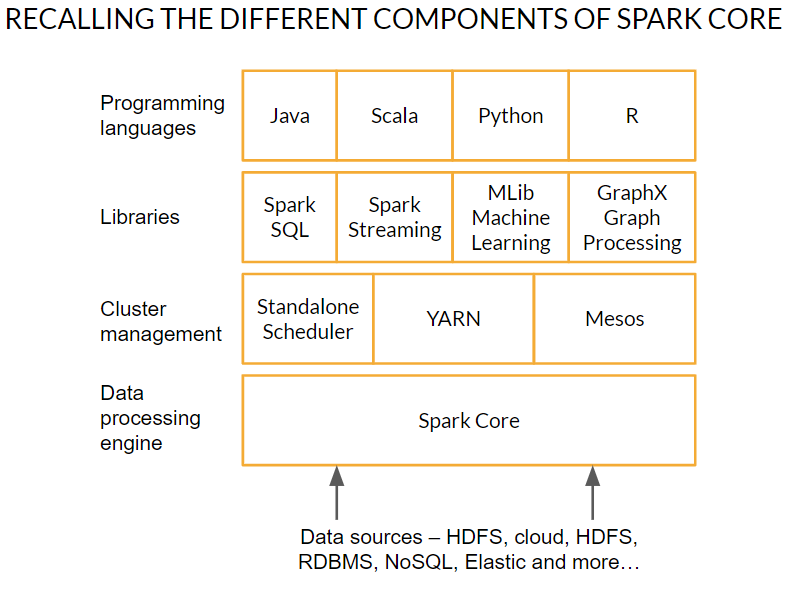

## 1. different components of Spark ML

In [111]:
from pyspark.sql import SparkSession
from pyspark.sql.types import *
spark = SparkSession.builder.appName('xvspark').getOrCreate()

23/10/26 19:44:12 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.


In [112]:
# Importing or creating Data and creating a Dataframe
#create the structure of schema

schema = StructType().add("id","integer").add("name","string").add("qualification","string").add("age", "integer").add("gender", "string").add("passed", "integer")
#create data
data = [
    (1,'John',"B.A.", 20, "Male", 1),
    (2,'Martha',"B.Com.", 20, "Female", 1),
    (3,'Mona',"B.Com.", 21, "Female", 1),
    (4,'Harish',"B.Sc.", 22, "Male", 1),
    (5,'Jonny',"B.A.", 22, "Male", 0),
    (6,'Maria',"B.A.", 23, "Female", 1),
    (7,'Monalisa',"B.A.", 21, "Female", 0)
]

In [113]:
#create dataframe
df = spark.createDataFrame(data, schema=schema)
#columns of dataframe
df.columns

['id', 'name', 'qualification', 'age', 'gender', 'passed']

In [114]:
df.show()

+---+--------+-------------+---+------+------+
| id|    name|qualification|age|gender|passed|
+---+--------+-------------+---+------+------+
|  1|    John|         B.A.| 20|  Male|     1|
|  2|  Martha|       B.Com.| 20|Female|     1|
|  3|    Mona|       B.Com.| 21|Female|     1|
|  4|  Harish|        B.Sc.| 22|  Male|     1|
|  5|   Jonny|         B.A.| 22|  Male|     0|
|  6|   Maria|         B.A.| 23|Female|     1|
|  7|Monalisa|         B.A.| 21|Female|     0|
+---+--------+-------------+---+------+------+



In [115]:
df.describe().show()

+-------+-----------------+--------+-------------+------------------+------+------------------+
|summary|               id|    name|qualification|               age|gender|            passed|
+-------+-----------------+--------+-------------+------------------+------+------------------+
|  count|                7|       7|            7|                 7|     7|                 7|
|   mean|              4.0|    NULL|         NULL|21.285714285714285|  NULL|0.7142857142857143|
| stddev|2.160246899469287|    NULL|         NULL| 1.112697280528374|  NULL|0.4879500364742666|
|    min|                1|  Harish|         B.A.|                20|Female|                 0|
|    max|                7|Monalisa|        B.Sc.|                23|  Male|                 1|
+-------+-----------------+--------+-------------+------------------+------+------------------+



In [116]:
df.printSchema() 

root
 |-- id: integer (nullable = true)
 |-- name: string (nullable = true)
 |-- qualification: string (nullable = true)
 |-- age: integer (nullable = true)
 |-- gender: string (nullable = true)
 |-- passed: integer (nullable = true)



### Feature Transformers
Feature transformer transforms the data stored in a data frame and store the data back as a new data frame. This transformation generally takes place by appending one or more columns to the existing data frame. It can be broken down to simple following sequence DataFrame =[transform]=> DataFrame. Transformer methods are generally executed during the step of preparing and processing the data sets. A transformer is a part of Spark ML and is implemented in Java through the Transformer base class. The .transform() method, which is used for transforming one DataFrame to another, is available through this class.

Link to Doumentation - https://spark.apache.org/docs/latest/ml-features.html#feature-transformers

#### StringIndexer
StringIndexer encodes a string column of labels to a column of label indices. StringIndexer can encode multiple columns. The indices are in [0, numLabels), and four ordering options are supported: “frequencyDesc”: descending order by label frequency (most frequent label assigned 0), “frequencyAsc”: ascending order by label frequency (least frequent label assigned 0), “alphabetDesc”: descending alphabetical order, and “alphabetAsc”: ascending alphabetical order (default = “frequencyDesc”). Note that in case of equal frequency when under “frequencyDesc”/”frequencyAsc”, the strings are further sorted by alphabet.

In [117]:
#import required libraries
from pyspark.ml.feature import StringIndexer
qualification_indexer = StringIndexer(inputCol="qualification", outputCol="qualificationIndex")
#Fits a model to the input dataset with optional parameters.
df = qualification_indexer.fit(df).transform(df)
df.show()

+---+--------+-------------+---+------+------+------------------+
| id|    name|qualification|age|gender|passed|qualificationIndex|
+---+--------+-------------+---+------+------+------------------+
|  1|    John|         B.A.| 20|  Male|     1|               0.0|
|  2|  Martha|       B.Com.| 20|Female|     1|               1.0|
|  3|    Mona|       B.Com.| 21|Female|     1|               1.0|
|  4|  Harish|        B.Sc.| 22|  Male|     1|               2.0|
|  5|   Jonny|         B.A.| 22|  Male|     0|               0.0|
|  6|   Maria|         B.A.| 23|Female|     1|               0.0|
|  7|Monalisa|         B.A.| 21|Female|     0|               0.0|
+---+--------+-------------+---+------+------+------------------+



In [118]:
#Apply StringIndexer to gender column
gender_indexer = StringIndexer(inputCol="gender", outputCol="genderIndex")
df = gender_indexer.fit(df).transform(df)
df.show()

+---+--------+-------------+---+------+------+------------------+-----------+
| id|    name|qualification|age|gender|passed|qualificationIndex|genderIndex|
+---+--------+-------------+---+------+------+------------------+-----------+
|  1|    John|         B.A.| 20|  Male|     1|               0.0|        1.0|
|  2|  Martha|       B.Com.| 20|Female|     1|               1.0|        0.0|
|  3|    Mona|       B.Com.| 21|Female|     1|               1.0|        0.0|
|  4|  Harish|        B.Sc.| 22|  Male|     1|               2.0|        1.0|
|  5|   Jonny|         B.A.| 22|  Male|     0|               0.0|        1.0|
|  6|   Maria|         B.A.| 23|Female|     1|               0.0|        0.0|
|  7|Monalisa|         B.A.| 21|Female|     0|               0.0|        0.0|
+---+--------+-------------+---+------+------+------------------+-----------+



#### OneHotEncoder
One-hot encoding maps a categorical feature, represented as a label index, to a binary vector with at most a single one-value indicating the presence of a specific feature value from among the set of all feature values. This encoding allows algorithms which expect continuous features, such as Logistic Regression, to use categorical features. For string type input data, it is common to encode categorical features using StringIndexer first.

In [119]:
#Apply OneHotEncoder to qualificationIndex and genderIndex columns
from pyspark.ml.feature import OneHotEncoder
#onehotencoder to qualificationIndex
encoded = OneHotEncoder(inputCol="qualificationIndex", outputCol="qualification_vec")
ohe = encoded.fit(df) # indexer is the existing dataframe, see the question
df = ohe.transform(df)
df.show()

+---+--------+-------------+---+------+------+------------------+-----------+-----------------+
| id|    name|qualification|age|gender|passed|qualificationIndex|genderIndex|qualification_vec|
+---+--------+-------------+---+------+------+------------------+-----------+-----------------+
|  1|    John|         B.A.| 20|  Male|     1|               0.0|        1.0|    (2,[0],[1.0])|
|  2|  Martha|       B.Com.| 20|Female|     1|               1.0|        0.0|    (2,[1],[1.0])|
|  3|    Mona|       B.Com.| 21|Female|     1|               1.0|        0.0|    (2,[1],[1.0])|
|  4|  Harish|        B.Sc.| 22|  Male|     1|               2.0|        1.0|        (2,[],[])|
|  5|   Jonny|         B.A.| 22|  Male|     0|               0.0|        1.0|    (2,[0],[1.0])|
|  6|   Maria|         B.A.| 23|Female|     1|               0.0|        0.0|    (2,[0],[1.0])|
|  7|Monalisa|         B.A.| 21|Female|     0|               0.0|        0.0|    (2,[0],[1.0])|
+---+--------+-------------+---+------+-

In [120]:
#Apply OneHotEncoder to qualificationIndex and genderIndex columns
from pyspark.ml.feature import OneHotEncoder
#onehotencoder to qualificationIndex
encoded1 = OneHotEncoder(inputCol="genderIndex", outputCol="gender_vec")
ohe = encoded1.fit(df) # indexer is the existing dataframe, see the question
df = ohe.transform(df)
df.show()

+---+--------+-------------+---+------+------+------------------+-----------+-----------------+-------------+
| id|    name|qualification|age|gender|passed|qualificationIndex|genderIndex|qualification_vec|   gender_vec|
+---+--------+-------------+---+------+------+------------------+-----------+-----------------+-------------+
|  1|    John|         B.A.| 20|  Male|     1|               0.0|        1.0|    (2,[0],[1.0])|    (1,[],[])|
|  2|  Martha|       B.Com.| 20|Female|     1|               1.0|        0.0|    (2,[1],[1.0])|(1,[0],[1.0])|
|  3|    Mona|       B.Com.| 21|Female|     1|               1.0|        0.0|    (2,[1],[1.0])|(1,[0],[1.0])|
|  4|  Harish|        B.Sc.| 22|  Male|     1|               2.0|        1.0|        (2,[],[])|    (1,[],[])|
|  5|   Jonny|         B.A.| 22|  Male|     0|               0.0|        1.0|    (2,[0],[1.0])|    (1,[],[])|
|  6|   Maria|         B.A.| 23|Female|     1|               0.0|        0.0|    (2,[0],[1.0])|(1,[0],[1.0])|
|  7|Monal

#### VectorAssembler
VectorAssembler is a transformer that combines a given list of columns into a single vector column. It is useful for combining raw features and features generated by different feature transformers into a single feature vector, in order to train ML models like logistic regression and decision trees. VectorAssembler accepts the following input column types: all numeric types, boolean type, and vector type. In each row, the values of the input columns will be concatenated into a vector in the specified order.

In [121]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler


assembler = VectorAssembler(
    inputCols=["age", "qualification_vec", "gender_vec"], 
    outputCol="features")

output = assembler.transform(df)
df = assembler.transform(df)
df.show()

+---+--------+-------------+---+------+------+------------------+-----------+-----------------+-------------+------------------+
| id|    name|qualification|age|gender|passed|qualificationIndex|genderIndex|qualification_vec|   gender_vec|          features|
+---+--------+-------------+---+------+------+------------------+-----------+-----------------+-------------+------------------+
|  1|    John|         B.A.| 20|  Male|     1|               0.0|        1.0|    (2,[0],[1.0])|    (1,[],[])|[20.0,1.0,0.0,0.0]|
|  2|  Martha|       B.Com.| 20|Female|     1|               1.0|        0.0|    (2,[1],[1.0])|(1,[0],[1.0])|[20.0,0.0,1.0,1.0]|
|  3|    Mona|       B.Com.| 21|Female|     1|               1.0|        0.0|    (2,[1],[1.0])|(1,[0],[1.0])|[21.0,0.0,1.0,1.0]|
|  4|  Harish|        B.Sc.| 22|  Male|     1|               2.0|        1.0|        (2,[],[])|    (1,[],[])|    (4,[0],[22.0])|
|  5|   Jonny|         B.A.| 22|  Male|     0|               0.0|        1.0|    (2,[0],[1.0])|  

In [122]:
df = df.select(['features','passed'])
df.show()

+------------------+------+
|          features|passed|
+------------------+------+
|[20.0,1.0,0.0,0.0]|     1|
|[20.0,0.0,1.0,1.0]|     1|
|[21.0,0.0,1.0,1.0]|     1|
|    (4,[0],[22.0])|     1|
|[22.0,1.0,0.0,0.0]|     0|
|[23.0,1.0,0.0,1.0]|     1|
|[21.0,1.0,0.0,1.0]|     0|
+------------------+------+



### Estimators 

An estimator is a stage of the learning algorithm that fits a model on a dataset. The whole process can be denoted as follows DataFrame =[fit]=> Model. An estimator is executed during the step of building a model using existing data. A model, which will be made by the estimator, itself serves as a transformer. Further, an estimator is available in Java through the Estimator class. The .fit() method, which is used for building a model, is available through this class.

In [123]:
from pyspark.ml.classification import LogisticRegression

trainData, testData = df.randomSplit([0.7, 0.3])

In [124]:
lr = LogisticRegression(featuresCol='features', labelCol='passed')
model = lr.fit(df)

23/10/26 19:44:23 WARN InstanceBuilder: Failed to load implementation from:dev.ludovic.netlib.blas.JNIBLAS


### Evaluators

In [125]:
summary = model.evaluate(df)

In [126]:
summary.accuracy

0.7142857142857143

## Pipeline

A pipeline is a series of activities or transformations. Machine learning is performed by implementing a set of tasks, that is collecting the data, cleaning the data, building the model, evaluating the model, etc. All these steps need to be performed one after the other in a particular sequence. In short, a pipeline can be considered as a series of activities wrapped together for better representations. Pipelines primarily have four principal objects- DataFrame, Transformer, Estimator, and Evaluator.

In [127]:
#Using Pipeline #import module
from pyspark.ml import Pipeline

#create the structure of schema
schema = StructType().add("id","integer").add("name","string").add("qualification","string").add("age", "integer").add("gender", "string").add("passed", "integer")

#create data
data = [
    (1,'John',"B.A.", 20, "Male", 1),
    (2,'Martha',"B.Com.", 20, "Female", 1),
    (3,'Mona',"B.Com.", 21, "Female", 1),
    (4,'Harish',"B.Sc.", 22, "Male", 1),
    (5,'Jonny',"B.A.", 22, "Male", 0),
    (6,'Maria',"B.A.", 23, "Female", 1),
    (7,'Monalisa',"B.A.", 21, "Female", 0)
]
df = spark.createDataFrame(data, schema=schema)
df.show()

#Convert qualification and gender columns to numeric
qualification_indexer = StringIndexer(inputCol="qualification", outputCol="qualificationIndex")
gender_indexer = StringIndexer(inputCol="gender", outputCol="genderIndex")

#Convert qualificationIndex and genderIndex
onehot_encoder1 = OneHotEncoder(inputCol="qualificationIndex", outputCol="qualification_vec")
onehot_encoder2 = OneHotEncoder(inputCol="genderIndex", outputCol="gender_vec")

#Merge multiple columns into a vector column
vector_assembler = VectorAssembler(inputCols=['age', 'qualification_vec', 'gender_vec'], outputCol='features')
#Create pipeline and pass it to stages
pipeline = Pipeline(stages=[
           qualification_indexer, 
           gender_indexer,
           onehot_encoder1, onehot_encoder2, 
           vector_assembler, model
])
#Use .fit() and .transform() on the pipeline
df_transformed = pipeline.fit(df).transform(df)
df_transformed.show()

+---+--------+-------------+---+------+------+
| id|    name|qualification|age|gender|passed|
+---+--------+-------------+---+------+------+
|  1|    John|         B.A.| 20|  Male|     1|
|  2|  Martha|       B.Com.| 20|Female|     1|
|  3|    Mona|       B.Com.| 21|Female|     1|
|  4|  Harish|        B.Sc.| 22|  Male|     1|
|  5|   Jonny|         B.A.| 22|  Male|     0|
|  6|   Maria|         B.A.| 23|Female|     1|
|  7|Monalisa|         B.A.| 21|Female|     0|
+---+--------+-------------+---+------+------+

+---+--------+-------------+---+------+------+------------------+-----------+-----------------+-------------+------------------+--------------------+--------------------+----------+
| id|    name|qualification|age|gender|passed|qualificationIndex|genderIndex|qualification_vec|   gender_vec|          features|       rawPrediction|         probability|prediction|
+---+--------+-------------+---+------+------+------------------+-----------+-----------------+-------------+---------

## 2. Building Linear Regression Model Using Spark ML

In [128]:
from pyspark.ml.regression import LinearRegression

In [129]:
df = spark.read.csv('/kaggle/input/boston-housing-dataset/housing4.csv', header=True, inferSchema=True)

In [130]:
df.show()

+-------+----+-----+----+-----+-----+-----+------+---+---+-------+------+-----+-----+
|   CRIM|  ZN|INDUS|CHAS|  NOX|   RM|  AGE|   DIS|RAD|TAX|PTRATIO|     B|LSTAT|PRICE|
+-------+----+-----+----+-----+-----+-----+------+---+---+-------+------+-----+-----+
|0.00632|18.0| 2.31|   0|0.538|6.575| 65.2|  4.09|  1|296|   15.3| 396.9| 4.98| 24.0|
|0.02731| 0.0| 7.07|   0|0.469|6.421| 78.9|4.9671|  2|242|   17.8| 396.9| 9.14| 21.6|
|0.02729| 0.0| 7.07|   0|0.469|7.185| 61.1|4.9671|  2|242|   17.8|392.83| 4.03| 34.7|
|0.03237| 0.0| 2.18|   0|0.458|6.998| 45.8|6.0622|  3|222|   18.7|394.63| 2.94| 33.4|
|0.06905| 0.0| 2.18|   0|0.458|7.147| 54.2|6.0622|  3|222|   18.7| 396.9| 5.33| 36.2|
|0.02985| 0.0| 2.18|   0|0.458| 6.43| 58.7|6.0622|  3|222|   18.7|394.12| 5.21| 28.7|
|0.08829|12.5| 7.87|   0|0.524|6.012| 66.6|5.5605|  5|311|   15.2| 395.6|12.43| 22.9|
|0.14455|12.5| 7.87|   0|0.524|6.172| 96.1|5.9505|  5|311|   15.2| 396.9|19.15| 27.1|
|0.21124|12.5| 7.87|   0|0.524|5.631|100.0|6.0821|  5|

In [131]:
df.printSchema()

root
 |-- CRIM: double (nullable = true)
 |-- ZN: double (nullable = true)
 |-- INDUS: double (nullable = true)
 |-- CHAS: integer (nullable = true)
 |-- NOX: double (nullable = true)
 |-- RM: double (nullable = true)
 |-- AGE: double (nullable = true)
 |-- DIS: double (nullable = true)
 |-- RAD: integer (nullable = true)
 |-- TAX: integer (nullable = true)
 |-- PTRATIO: double (nullable = true)
 |-- B: double (nullable = true)
 |-- LSTAT: double (nullable = true)
 |-- PRICE: double (nullable = true)



In [132]:
from pyspark.ml.feature import VectorAssembler
assembler = VectorAssembler(inputCols=[c for c in df.columns if c != 'PRICE'],
                            outputCol='features')
dataset = assembler.transform(df)
dataset.show()

+-------+----+-----+----+-----+-----+-----+------+---+---+-------+------+-----+-----+--------------------+
|   CRIM|  ZN|INDUS|CHAS|  NOX|   RM|  AGE|   DIS|RAD|TAX|PTRATIO|     B|LSTAT|PRICE|            features|
+-------+----+-----+----+-----+-----+-----+------+---+---+-------+------+-----+-----+--------------------+
|0.00632|18.0| 2.31|   0|0.538|6.575| 65.2|  4.09|  1|296|   15.3| 396.9| 4.98| 24.0|[0.00632,18.0,2.3...|
|0.02731| 0.0| 7.07|   0|0.469|6.421| 78.9|4.9671|  2|242|   17.8| 396.9| 9.14| 21.6|[0.02731,0.0,7.07...|
|0.02729| 0.0| 7.07|   0|0.469|7.185| 61.1|4.9671|  2|242|   17.8|392.83| 4.03| 34.7|[0.02729,0.0,7.07...|
|0.03237| 0.0| 2.18|   0|0.458|6.998| 45.8|6.0622|  3|222|   18.7|394.63| 2.94| 33.4|[0.03237,0.0,2.18...|
|0.06905| 0.0| 2.18|   0|0.458|7.147| 54.2|6.0622|  3|222|   18.7| 396.9| 5.33| 36.2|[0.06905,0.0,2.18...|
|0.02985| 0.0| 2.18|   0|0.458| 6.43| 58.7|6.0622|  3|222|   18.7|394.12| 5.21| 28.7|[0.02985,0.0,2.18...|
|0.08829|12.5| 7.87|   0|0.524|6.012|

In [133]:
lr = LinearRegression(featuresCol='features', labelCol='PRICE')

trainData, testData = dataset.randomSplit([0.7, 0.3])

model = lr.fit(trainData)
summary = model.evaluate(testData)

23/10/26 19:44:31 WARN Instrumentation: [65d1af35] regParam is zero, which might cause numerical instability and overfitting.
23/10/26 19:44:31 WARN InstanceBuilder: Failed to load implementation from:dev.ludovic.netlib.lapack.JNILAPACK


In [134]:
print(summary.r2)

0.7643912796106118


In [135]:
output = model.transform(dataset)
output.select('prediction').show()

+------------------+
|        prediction|
+------------------+
|30.075183808978924|
|24.585013865557123|
|29.806340299273014|
|28.112400509994544|
|27.423329433204177|
|25.002749327106926|
|22.711126574474324|
|19.202592808097577|
|11.246760107369905|
| 18.45848028286404|
|18.483268765944818|
|21.243008777065533|
|20.498335739934877|
|19.353842876790583|
|19.131653834035504|
| 19.14794445368376|
|20.198868589521762|
|16.800727595314637|
|15.881247488232582|
|18.459683928099395|
+------------------+
only showing top 20 rows



In [136]:
from pyspark.ml.evaluation import RegressionEvaluator
evaluator = RegressionEvaluator(labelCol='PRICE', predictionCol='prediction', metricName='r2')
evaluator.evaluate(output)

0.7353048446141521

In [137]:
#Using Pipeline #import module
from pyspark.ml import Pipeline

df = spark.read.csv('/kaggle/input/boston-housing-dataset/housing4.csv', header=True, inferSchema=True)

#Merge multiple columns into a vector column
assembler = VectorAssembler(inputCols=[c for c in df.columns if c != 'PRICE'],
                            outputCol='features')
dataset = assembler.transform(df)

#Create pipeline and pass it to stages
pipeline = Pipeline(stages=[
           assembler, model
])
#Use .fit() and .transform() on the pipeline
df_transformed = pipeline.fit(df).transform(df)
df_transformed.show()

+-------+----+-----+----+-----+-----+-----+------+---+---+-------+------+-----+-----+--------------------+------------------+
|   CRIM|  ZN|INDUS|CHAS|  NOX|   RM|  AGE|   DIS|RAD|TAX|PTRATIO|     B|LSTAT|PRICE|            features|        prediction|
+-------+----+-----+----+-----+-----+-----+------+---+---+-------+------+-----+-----+--------------------+------------------+
|0.00632|18.0| 2.31|   0|0.538|6.575| 65.2|  4.09|  1|296|   15.3| 396.9| 4.98| 24.0|[0.00632,18.0,2.3...|30.075183808978924|
|0.02731| 0.0| 7.07|   0|0.469|6.421| 78.9|4.9671|  2|242|   17.8| 396.9| 9.14| 21.6|[0.02731,0.0,7.07...|24.585013865557123|
|0.02729| 0.0| 7.07|   0|0.469|7.185| 61.1|4.9671|  2|242|   17.8|392.83| 4.03| 34.7|[0.02729,0.0,7.07...|29.806340299273014|
|0.03237| 0.0| 2.18|   0|0.458|6.998| 45.8|6.0622|  3|222|   18.7|394.63| 2.94| 33.4|[0.03237,0.0,2.18...|28.112400509994544|
|0.06905| 0.0| 2.18|   0|0.458|7.147| 54.2|6.0622|  3|222|   18.7| 396.9| 5.33| 36.2|[0.06905,0.0,2.18...|27.423329433

## 2. Logistic Regression using pysaprk

In [138]:
df = spark.read.csv('/kaggle/input/ctr-dataset/ctr_traindata2.csv', header=True, inferSchema=True)
df.show(3)

+--------------------+-----+--------+----+----------+--------+-----------+-------------+--------+----------+------------+---------+---------+------------+-----------+----------------+-----+---+---+----+---+---+------+---+
|                  id|click|    hour|  C1|banner_pos| site_id|site_domain|site_category|  app_id|app_domain|app_category|device_id|device_ip|device_model|device_type|device_conn_type|  C14|C15|C16| C17|C18|C19|   C20|C21|
+--------------------+-----+--------+----+----------+--------+-----------+-------------+--------+----------+------------+---------+---------+------------+-----------+----------------+-----+---+---+----+---+---+------+---+
| 1000009418151094273|    0|14102100|1005|         0|1fbe01fe|   f3845767|     28905ebd|ecad2386|  7801e8d9|    07d7df22| a99f214a| ddd2926e|    44956a24|          1|               2|15706|320| 50|1722|  0| 35|    -1| 79|
|10000169349117863715|    0|14102100|1005|         0|1fbe01fe|   f3845767|     28905ebd|ecad2386|  7801e8d9|    

In [139]:
df.columns

['id',
 'click',
 'hour',
 'C1',
 'banner_pos',
 'site_id',
 'site_domain',
 'site_category',
 'app_id',
 'app_domain',
 'app_category',
 'device_id',
 'device_ip',
 'device_model',
 'device_type',
 'device_conn_type',
 'C14',
 'C15',
 'C16',
 'C17',
 'C18',
 'C19',
 'C20',
 'C21']

In [140]:
df_selected = df.select(['click', 'C1', 'banner_pos', 'device_type', 'device_conn_type', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21'])

In [141]:
df_selected.head()

Row(click=0, C1=1005, banner_pos=0, device_type=1, device_conn_type=2, C14=15706, C15=320, C16=50, C17=1722, C18=0, C19=35, C20=-1, C21=79)

In [142]:
df_selected.select("click").distinct().show()

+-----+
|click|
+-----+
|    1|
|    0|
+-----+



In [143]:
df_selected.select("C14").distinct().show()

+-----+
|  C14|
+-----+
|17753|
|20382|
|21700|
|20135|
|  463|
| 6397|
|20596|
| 6393|
|19878|
|12471|
| 6559|
| 1270|
|21633|
|20170|
|21296|
| 6361|
|21412|
|21675|
|21484|
| 6557|
+-----+
only showing top 20 rows



In [144]:
df_selected.groupby('click').count().show()

+-----+-----+
|click|count|
+-----+-----+
|    1|17490|
|    0|82509|
+-----+-----+



In [145]:
from pyspark.sql.functions import col, countDistinct
df_selected.agg(countDistinct("click")).show()

+---------------------+
|count(DISTINCT click)|
+---------------------+
|                    2|
+---------------------+



In [146]:
df_selected.agg(countDistinct("C14")).show()

+-------------------+
|count(DISTINCT C14)|
+-------------------+
|                420|
+-------------------+



In [147]:
df_selected.columns

['click',
 'C1',
 'banner_pos',
 'device_type',
 'device_conn_type',
 'C14',
 'C15',
 'C16',
 'C17',
 'C18',
 'C19',
 'C20',
 'C21']

In [148]:
## Get Distinct Count of Categorical Features
df_selected.agg(*(countDistinct(col(c)).alias(c) for c in df_selected.columns)).show()

+-----+---+----------+-----------+----------------+---+---+---+---+---+---+---+---+
|click| C1|banner_pos|device_type|device_conn_type|C14|C15|C16|C17|C18|C19|C20|C21|
+-----+---+----------+-----------+----------------+---+---+---+---+---+---+---+---+
|    2|  6|         5|          4|               4|420|  5|  6|128|  4| 37|137| 29|
+-----+---+----------+-----------+----------------+---+---+---+---+---+---+---+---+



In [149]:
### Avoid features which are having huge distinct count, Since that many columns will be created while One Hot Encoding
df_filtered = df_selected.select(['click', 'C1', 'banner_pos', 'device_type', 'device_conn_type', 'C15', 'C16', 'C18'])
df_filtered.show(10)

+-----+----+----------+-----------+----------------+---+---+---+
|click|  C1|banner_pos|device_type|device_conn_type|C15|C16|C18|
+-----+----+----------+-----------+----------------+---+---+---+
|    0|1005|         0|          1|               2|320| 50|  0|
|    0|1005|         0|          1|               0|320| 50|  0|
|    0|1005|         0|          1|               0|320| 50|  0|
|    0|1005|         0|          1|               0|320| 50|  0|
|    0|1005|         1|          1|               0|320| 50|  0|
|    0|1005|         0|          1|               0|320| 50|  0|
|    0|1005|         0|          1|               0|320| 50|  0|
|    0|1005|         1|          1|               0|320| 50|  3|
|    1|1005|         0|          1|               2|320| 50|  0|
|    0|1002|         0|          0|               0|320| 50|  3|
+-----+----+----------+-----------+----------------+---+---+---+
only showing top 10 rows



In [150]:
df_filtered.agg(*(countDistinct(col(c)).alias(c) for c in df_filtered.columns)).show()

+-----+---+----------+-----------+----------------+---+---+---+
|click| C1|banner_pos|device_type|device_conn_type|C15|C16|C18|
+-----+---+----------+-----------+----------------+---+---+---+
|    2|  6|         5|          4|               4|  5|  6|  4|
+-----+---+----------+-----------+----------------+---+---+---+



In [151]:
df_filtered.printSchema()

root
 |-- click: integer (nullable = true)
 |-- C1: integer (nullable = true)
 |-- banner_pos: integer (nullable = true)
 |-- device_type: integer (nullable = true)
 |-- device_conn_type: integer (nullable = true)
 |-- C15: integer (nullable = true)
 |-- C16: integer (nullable = true)
 |-- C18: integer (nullable = true)



In [152]:
# Data Preparation
# No String, All Integer columns, So String Indexer not required, we can directly go for one-hot encoding

# One hot encoding
from pyspark.ml import Pipeline
from pyspark.ml.feature import VectorAssembler, StringIndexer, OneHotEncoder

In [153]:
OHE = OneHotEncoder(inputCols=['C1', 'banner_pos', 'device_type', 'device_conn_type',
                                        'C15', 'C16', 'C18'],outputCols=['C1_encoded', 'banner_pos_encoded', 
                                                                         'device_type_encoded', 
                                                                         'device_conn_type_encoded', 'C15_encoded',
                                                                         'C16_encoded', 'C18_encoded'])

In [154]:
vec_assembler = VectorAssembler(inputCols=['C1_encoded', 'banner_pos_encoded', 
                                           'device_type_encoded', 'device_conn_type_encoded', 
                                           'C15_encoded', 'C16_encoded', 'C18_encoded'], outputCol="features")

In [155]:
# Make the pipeline
final_pipe = Pipeline(stages=[OHE, vec_assembler])

In [156]:
piped_data = final_pipe.fit(df_filtered).transform(df_filtered)

In [157]:
piped_data.show(10)

+-----+----+----------+-----------+----------------+---+---+---+-------------------+------------------+-------------------+------------------------+-----------------+----------------+-------------+--------------------+
|click|  C1|banner_pos|device_type|device_conn_type|C15|C16|C18|         C1_encoded|banner_pos_encoded|device_type_encoded|device_conn_type_encoded|      C15_encoded|     C16_encoded|  C18_encoded|            features|
+-----+----+----------+-----------+----------------+---+---+---+-------------------+------------------+-------------------+------------------------+-----------------+----------------+-------------+--------------------+
|    0|1005|         0|          1|               2|320| 50|  0|(1010,[1005],[1.0])|     (5,[0],[1.0])|      (5,[1],[1.0])|           (5,[2],[1.0])|(728,[320],[1.0])|(480,[50],[1.0])|(3,[0],[1.0])|(2236,[1005,1010,...|
|    0|1005|         0|          1|               0|320| 50|  0|(1010,[1005],[1.0])|     (5,[0],[1.0])|      (5,[1],[1.0])| 

In [158]:
piped_dataset = piped_data.withColumnRenamed("click", "label")
piped_dataset.show(10)

+-----+----+----------+-----------+----------------+---+---+---+-------------------+------------------+-------------------+------------------------+-----------------+----------------+-------------+--------------------+
|label|  C1|banner_pos|device_type|device_conn_type|C15|C16|C18|         C1_encoded|banner_pos_encoded|device_type_encoded|device_conn_type_encoded|      C15_encoded|     C16_encoded|  C18_encoded|            features|
+-----+----+----------+-----------+----------------+---+---+---+-------------------+------------------+-------------------+------------------------+-----------------+----------------+-------------+--------------------+
|    0|1005|         0|          1|               2|320| 50|  0|(1010,[1005],[1.0])|     (5,[0],[1.0])|      (5,[1],[1.0])|           (5,[2],[1.0])|(728,[320],[1.0])|(480,[50],[1.0])|(3,[0],[1.0])|(2236,[1005,1010,...|
|    0|1005|         0|          1|               0|320| 50|  0|(1010,[1005],[1.0])|     (5,[0],[1.0])|      (5,[1],[1.0])| 

In [159]:
model_data = piped_dataset.select(['label','features'])
model_data.show(10)

+-----+--------------------+
|label|            features|
+-----+--------------------+
|    0|(2236,[1005,1010,...|
|    0|(2236,[1005,1010,...|
|    0|(2236,[1005,1010,...|
|    0|(2236,[1005,1010,...|
|    0|(2236,[1005,1011,...|
|    0|(2236,[1005,1010,...|
|    0|(2236,[1005,1010,...|
|    0|(2236,[1005,1011,...|
|    1|(2236,[1005,1010,...|
|    0|(2236,[1002,1010,...|
+-----+--------------------+
only showing top 10 rows



In [160]:
# Model Building
training, test = model_data.randomSplit([.7, .3])
training.count()

70217

In [161]:
# Logistic Regression Model
from pyspark.ml.classification import LogisticRegression

In [162]:
lr = LogisticRegression(featuresCol='features', labelCol='label')
lr

LogisticRegression_9671dc9ccac1

In [163]:
model = lr.fit(training)
model

LogisticRegressionModel: uid=LogisticRegression_9671dc9ccac1, numClasses=2, numFeatures=2236

In [164]:
# Model Evaluation

# Print the coefficients and intercept for logistic regression
print("Coefficients: " + str(model.coefficients))
print("Intercept: " + str(model.intercept))

Coefficients: (2236,[1001,1002,1005,1007,1008,1010,1011,1012,1014,1015,1016,1019,1020,1022,1023,1145,1241,1325,1345,1773,1789,1803,1843,2003,2233,2234,2235],[0.37317132685242227,0.41691151861516196,0.37704947622559637,-11.373998876838977,1.8642397134979205,-0.1004320174745295,0.10222698801976039,0.3288265164909591,-11.93087085329728,0.41691151861516196,0.22465797138304047,-0.2600549193425306,0.6730745820312775,0.5878442708479109,0.4469474053831947,-6.203247941483424,-0.27276829289379917,0.2626183284905674,-0.12069178242178084,-6.203247941483424,-0.27276829289379917,-0.6188023706678633,-11.515558638912086,-0.19526071558643407,0.135422135932575,-0.8050844843535891,1.0105833161486408])
Intercept: -2.310135012199496


In [165]:
trainingSummary = model.summary
roc = trainingSummary.roc.toPandas()

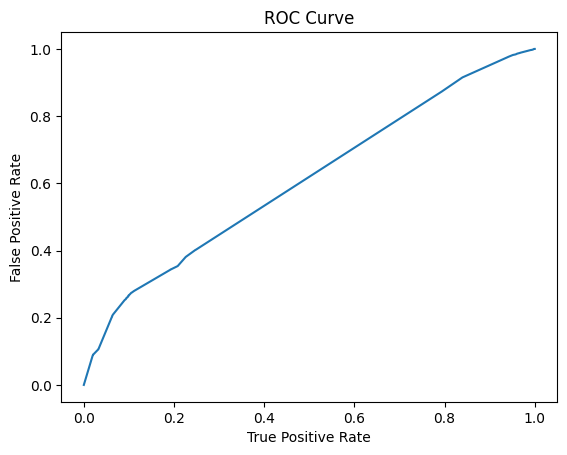

In [166]:
import matplotlib.pyplot as plt

plt.clf()
plt.plot(roc['FPR'],roc['TPR'])
plt.ylabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [167]:
print('Training set areaUnderROC: ' + str(trainingSummary.areaUnderROC))

Training set areaUnderROC: 0.6078056880554388


Text(0.5, 0, 'Recall')

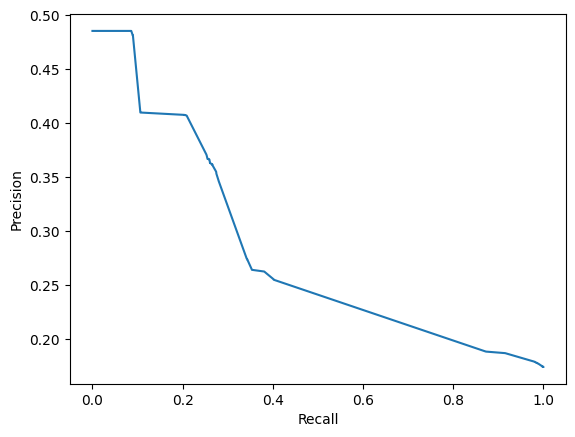

In [168]:
plt.clf()
pr = trainingSummary.pr.toPandas()
plt.plot(pr['recall'],pr['precision'])
plt.ylabel('Precision')
plt.xlabel('Recall')


In [169]:
summary = model.evaluate(test)

In [170]:
summary.accuracy

0.8242898395003694

In [171]:
output = model.transform(test)
output

DataFrame[label: int, features: vector, rawPrediction: vector, probability: vector, prediction: double]

In [172]:
# Probability Output
output.show(10)

+-----+--------------------+--------------------+--------------------+----------+
|label|            features|       rawPrediction|         probability|prediction|
+-----+--------------------+--------------------+--------------------+----------+
|    0|(2236,[1001,1010,...|[1.96438761368029...|[0.87700700892781...|       0.0|
|    0|(2236,[1002,1010,...|[1.44920599620002...|[0.80987620595017...|       0.0|
|    0|(2236,[1002,1010,...|[1.44920599620002...|[0.80987620595017...|       0.0|
|    0|(2236,[1002,1010,...|[1.44920599620002...|[0.80987620595017...|       0.0|
|    0|(2236,[1002,1010,...|[1.31378386026744...|[0.78814564377563...|       0.0|
|    0|(2236,[1002,1010,...|[1.31378386026744...|[0.78814564377563...|       0.0|
|    0|(2236,[1002,1010,...|[1.25985345258971...|[0.77900087942767...|       0.0|
|    0|(2236,[1002,1010,...|[1.25985345258971...|[0.77900087942767...|       0.0|
|    0|(2236,[1002,1010,...|[1.25985345258971...|[0.77900087942767...|       0.0|
|    0|(2236,[10

In [173]:
output.select('label','prediction').show(10)

+-----+----------+
|label|prediction|
+-----+----------+
|    0|       0.0|
|    0|       0.0|
|    0|       0.0|
|    0|       0.0|
|    0|       0.0|
|    0|       0.0|
|    0|       0.0|
|    0|       0.0|
|    0|       0.0|
|    0|       0.0|
+-----+----------+
only showing top 10 rows



In [174]:
# ROC
from pyspark.ml.evaluation import BinaryClassificationEvaluator
evaluator = BinaryClassificationEvaluator()
print('Test Area Under ROC', evaluator.evaluate(output))

Test Area Under ROC 0.6099437755445715


## 3. KMeans clustering using pyspark

In [175]:
df = spark.read.csv('/kaggle/input/music-data/music_data.csv', header=True, inferSchema=True)
df.show()

+--------------------+--------------------+--------------------+-----+
|              userid|            artistid|         artist_name|plays|
+--------------------+--------------------+--------------------+-----+
|00000c289a1829a80...|3bd73256-3905-4f3...|     betty blowtorch| 2137|
|00000c289a1829a80...|f2fb0ff0-5679-42e...|           die Ärzte| 1099|
|00000c289a1829a80...|b3ae82c2-e60b-455...|   melissa etheridge|  897|
|00000c289a1829a80...|3d6bbeb7-f90e-4d1...|           elvenking|  717|
|00000c289a1829a80...|bbd2ffd7-17f4-450...|juliette & the licks|  706|
|00000c289a1829a80...|8bfac288-ccc5-448...|red hot chili pep...|  691|
|00000c289a1829a80...|6531c8b1-76ea-414...|              magica|  545|
|00000c289a1829a80...|21f3573f-10cf-44b...|the black dahlia ...|  507|
|00000c289a1829a80...|c5db90c4-580d-4f3...|         the murmurs|  424|
|00000c289a1829a80...|0639533a-0402-40b...|          lunachicks|  403|
|00000c289a1829a80...|a342964d-ca53-4e5...|    walls of jericho|  393|
|00000

In [176]:
df.count()

999

In [177]:
# Select only Artist since we want artist clusters
df_artist = df.select(['artist_name', 'plays'])
df_artist.show(10)

+--------------------+-----+
|         artist_name|plays|
+--------------------+-----+
|     betty blowtorch| 2137|
|           die Ärzte| 1099|
|   melissa etheridge|  897|
|           elvenking|  717|
|juliette & the licks|  706|
|red hot chili pep...|  691|
|              magica|  545|
|the black dahlia ...|  507|
|         the murmurs|  424|
|          lunachicks|  403|
+--------------------+-----+
only showing top 10 rows



In [178]:
df_artist.count()

999

In [179]:
artist_aggr = df_artist.groupby('artist_name').sum()
artist_aggr.show(10)

+----------------+----------+
|     artist_name|sum(plays)|
+----------------+----------+
|        le tigre|       281|
|              l7|       135|
|             fog|       132|
|           hanna|         4|
| raymond & maria|       737|
|       amplifier|       175|
|     the beatles|      1041|
|      television|         7|
|    steel attack|       551|
|john jacob niles|        57|
+----------------+----------+
only showing top 10 rows



In [180]:
artist_aggr.count()

857

In [181]:
artist_aggr.columns

['artist_name', 'sum(plays)']

In [182]:
artist_aggr.select('sum(plays)').show(10)

+----------+
|sum(plays)|
+----------+
|       281|
|       135|
|       132|
|         4|
|       737|
|       175|
|      1041|
|         7|
|       551|
|        57|
+----------+
only showing top 10 rows



In [183]:
artist_data = artist_aggr.withColumnRenamed("sum(plays)", "plays_sum")
artist_data.show(10)

+----------------+---------+
|     artist_name|plays_sum|
+----------------+---------+
|        le tigre|      281|
|              l7|      135|
|             fog|      132|
|           hanna|        4|
| raymond & maria|      737|
|       amplifier|      175|
|     the beatles|     1041|
|      television|        7|
|    steel attack|      551|
|john jacob niles|       57|
+----------------+---------+
only showing top 10 rows



In [184]:
assembler = VectorAssembler(inputCols=['plays_sum'],outputCol='features')
model_data = assembler.transform(artist_data)
model_data.show(10)

+----------------+---------+--------+
|     artist_name|plays_sum|features|
+----------------+---------+--------+
|        le tigre|      281| [281.0]|
|              l7|      135| [135.0]|
|             fog|      132| [132.0]|
|           hanna|        4|   [4.0]|
| raymond & maria|      737| [737.0]|
|       amplifier|      175| [175.0]|
|     the beatles|     1041|[1041.0]|
|      television|        7|   [7.0]|
|    steel attack|      551| [551.0]|
|john jacob niles|       57|  [57.0]|
+----------------+---------+--------+
only showing top 10 rows



In [185]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator

In [186]:
kmeans = KMeans(k=7, seed=1)  

In [187]:
model = kmeans.fit(model_data.select('features'))
model

KMeansModel: uid=KMeans_fe4948af823e, k=7, distanceMeasure=euclidean, numFeatures=1

In [188]:
output = model.transform(model_data)
output.show(2)

+-----------+---------+--------+----------+
|artist_name|plays_sum|features|prediction|
+-----------+---------+--------+----------+
|   le tigre|      281| [281.0]|         0|
|         l7|      135| [135.0]|         0|
+-----------+---------+--------+----------+
only showing top 2 rows



In [189]:
centers = model.clusterCenters()
print("Cluster Centers: ")
for center in centers:
    print(center)

Cluster Centers: 
[100.58776167]
[3644.625]
[1755.54054054]
[11927.5]
[611.53846154]
[8192.]
[5438.83333333]


In [190]:
## Model Evaluation
## Silhouette Score
# Values closer to 1 indicate maximum separation.  The best value is 1 and the worst value is -1. 
# Values near 0 indicate overlapping clusters. Negative values generally indicate that a sample has been assigned to the 
# wrong cluster, as a different cluster is more similar.

# calculating Silhouette score
evaluator = ClusteringEvaluator()

In [191]:
silhouette_score = evaluator.evaluate(output)
print("silhouette_score = " + str(silhouette_score))

silhouette_score = 0.8319115547650691


In [192]:
## Elbow Method
ks = [3,7,10]
costfunction = []

for k_num in ks:
    # build kmeans model with k as no of cluster
    print("K :  ",k_num)
    model_k = KMeans(k=k_num , seed=1)

    # train the model
    model = model_k.fit(model_data.select('features'))


K :   3
K :   7
K :   10


# Happy Learning